# Gradient Boosting: XGBoost

before we start some basic settings are needed to improve the workflow:

In [1]:
# installing all packages we need
! pip install -r requirements.txt

In [2]:
import warnings

warnings.filterwarnings("ignore")

<html>
<head>
    <title>Table of Contents</title>
</head>
<body>
    <h2>Table of contents</h2>
    <ol style="list-style-type: none;">
        <li><a href="#intro">1. Intro</a></li>
        <li><a href="#dataset">2. Dataset</a>
            <ol style="list-style-type: none;">
                <li><a href="#loading">2.1 Load Dataset</a></li>
                <li><a href="#description">2.2 Data Description</a></li>
            </ol>
        </li>
        <li><a href="#dataanalysis">3. Data Analysis</a>
            <ol style="list-style-type: none;">
                <li><a href="#cleaning">3.1 Data Cleaning</a>
                    <ol style="list-style-type: none;">
                        <li><a href="#na">3.1.1 Null-Value Detection</a></li>
                        <li><a href="#outlier">3.1.2 Outlier Detection</a></li>
                    </ol>
                </li>
                <li><a href="#metric">3.2 Metric Variables</a></li>
                <li><a href="#ordinal">3.3 Ordinal Variables</a></li>
                <li><a href="#nominal">3.4 Nominal Variables</a></li>
                <li><a href="#correlations">3.5 Correlations</a></li>
                <li><a href="#metrics">3.6 Which Matric for our dataset?</a></li>
            </ol>
        </li>
        <li><a href="#gradientbosting">4. Gradient Boosting Explanation</a></li>
        <li><a href="#xgb">5. XGBoost Explanation</a></li>
        <li><a href="#implementation">6. XGBoost Implementation</a></li>
        <li><a href="#experiments">7. Experiments</a></li>
        <li><a href="#comparison">8. Comparison</a>
            <ol style="list-style-type: none;">
                <li><a href="#LightGBM">8.1 LightGBM</a></li>
                <li><a href="#CatBoost">8.2 CatBoost</a></li>
                <li><a href="#evaluation">8.3 Evaluation</a></li>
            </ol>
        </li>
        <li><a href="#conclusion">9. Conclusion</a></li>
        <li><a href="#future">10. Future Directions</a></li>
    </ol>
</body>
</html>

## 1. Intro <a class='anchor' id='intro'></a>

In this Python notebook, we dive into the world of extreme gradient boosting, or XGBoost for short. XGBoost is a powerful and versatile machine learning algorithm that has gained popularity for its effectiveness in a wide range of applications.

Our journey begins with a focus on data analytics and cleaning, where we will explore the dataset, perform data cleaning tasks, and gain a comprehensive understanding of our data. This step is crucial to ensure the quality and reliability of the dataset before applying advanced machine learning techniques.

Then we will proceed to provide an explanation of Gradient Boosting and especially XGBoost, including its key concepts and inner workings, followed by its implementation. Throughout this notebook, we will conduct experiments using XGBoost to provide a classification based on our dataset and evaluate its performance.

Additionally, we will compare XGBoost with other gradient boosting models, such as LightGBM and CatBoost, to assess their respective strengths and weaknesses.

This notebook is intended to give you a deeper understanding to XGBoost and gives you insights to model evaluation and optimization.

## 2. Dataset <a class='anchor' id='dataset'></a>

**Title:** [Smoking and Drinking Dataset with Body Signal](https://www.kaggle.com/datasets/sooyoungher/smoking-drinking-dataset)

**Introduction:**
The Smoking and Drinking Dataset with Body Signal is a valuable resource for predictive analysis aimed at identifying individuals who smoke and consume alcoholic beverages based on their body signal data. This dataset is a product of the National Health Insurance Service in Korea, and it has been carefully curated to ensure the exclusion of any personal information or sensitive data, thereby prioritizing privacy and data security.

**Dataset Purpose:**
The primary objectives of this dataset are as follows:

**Analysis of Body Signals:**
The dataset provides a comprehensive collection of body signal measurements, including various physiological and health-related attributes. Researchers and data scientists can leverage this rich source of information to gain insights into how these signals relate to smoking and drinking behaviors.

**Classification of Smokers and Drinkers:**
One of the key applications of this dataset is the classification of individuals into two distinct categories: smokers and drinkers. By employing machine learning and statistical techniques, practitioners can develop predictive models that can accurately identify whether an individual falls into one or both of these categories based on their body signal data.

**Data Overview:**
The Smoking and Drinking Dataset includes a wide range of variables, encompassing metrics such as age, height, weight, blood pressure, cholesterol levels, and many more. These metrics are essential for understanding the physiological characteristics of individuals in the dataset. Additionally, the dataset includes information about smoking status, drinking habits, and various body signal measurements.

### 2.1 Load Dataset <a class='anchor' id='loading'></a>

In [3]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Importing data
drinking_df = pd.read_csv("smoking_driking_dataset_Ver01.csv")
drinking_df

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991341,Male,45,175,80,92.1,1.5,1.5,1.0,1.0,114.0,...,125.0,132.0,15.0,1.0,1.0,26.0,36.0,27.0,1.0,N
991342,Male,35,170,75,86.0,1.0,1.5,1.0,1.0,119.0,...,84.0,45.0,15.8,1.0,1.1,14.0,17.0,15.0,1.0,N
991343,Female,40,155,50,68.0,1.0,0.7,1.0,1.0,110.0,...,77.0,157.0,14.3,1.0,0.8,30.0,27.0,17.0,3.0,Y
991344,Male,25,175,60,72.0,1.5,1.0,1.0,1.0,119.0,...,73.0,53.0,14.5,1.0,0.8,21.0,14.0,17.0,1.0,N


### 2.2 Data Description  <a class='anchor' id='description'></a>

In [4]:
drinking_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,991346.0,47.614491,14.181339,20.0,35.0,45.0,60.0,85.0
height,991346.0,162.240625,9.282957,130.0,155.0,160.0,170.0,190.0
weight,991346.0,63.284050,12.514241,25.0,55.0,60.0,70.0,140.0
waistline,991346.0,81.233358,11.850323,8.0,74.1,81.0,87.8,999.0
sight_left,991346.0,0.980834,0.605949,0.1,0.7,1.0,1.2,9.9
sight_right,991346.0,0.978429,0.604774,0.1,0.7,1.0,1.2,9.9
hear_left,991346.0,1.031495,0.174650,1.0,1.0,1.0,1.0,2.0
hear_right,991346.0,1.030476,0.171892,1.0,1.0,1.0,1.0,2.0
SBP,991346.0,122.432498,14.543148,67.0,112.0,120.0,131.0,273.0
DBP,991346.0,76.052627,9.889365,32.0,70.0,76.0,82.0,185.0


| Column/Feature   | Description                                                             |
|------------------|-------------------------------------------------------------------------|
| Sex              | male, female                                                            |
| Age              | round up to 5 years                                                     |
| Height           | round up to 5 cm (cm)                                                   |
| Weight           | (kg)                                                                    |
| Sight_left       | eyesight (left)                                                         |
| Sight_right      | eyesight (right)                                                        |
| Hear_left        | hearing left, 1 (normal), 2 (abnormal)                                  |
| Hear_right       | hearing right, 1 (normal), 2 (abnormal)                                 |
| SBP              | Systolic blood pressure (mmHg)                                          |
| DBP              | Diastolic blood pressure (mmHg)                                         |
| BLDS             | Blood Sugar Level or Fasting Blood Glucose (mg/dL)                      |
| Tot_chole        | total cholesterol (mg/dL)                                               |
| HDL_chole        | High-Density Lipoprotein cholesterol (mg/dL)                            |
| LDL_chole        | Low-Density Lipoprotein cholesterol (mg/dL)                             |
| Triglyceride     | triglyceride (mg/dL)                                                    |
| Hemoglobin       | hemoglobin (g/dL)                                                       |
| Urine_protein    | protein in urine, 1 (-), 2 (+/-), 3 (+1), 4 (+2), 5 (+3), 6 (+4)        |
| Serum_creatinine | serum (blood) creatinine (mg/dL)                                        |
| SGOT_AST         | Serum Glutamate Oxaloacetate Transaminase Aspartate Transaminase (IU/L) |
| SGOT_ALT         | Serum Glutamate Oxaloacetate Transaminase Alanine Transaminase (IU/L)   |
| Gamma_GTP        | γ-Glutamyl Transpeptidase (IU/L)                                        |
| SMK_stat_type_cd | Smoking state, 1 (never), 2 (used to smoke but quit), 3 (still smoke)   |
| DRK_YN           | Drinker or Not                                                          | 

1. The "**Sex**" column indicates the gender of the individuals in the dataset, with options for "male" or "female." 

2. "**Age**" represents the age of the individuals, rounded up to the nearest 5 years. 

3. "**Height**" specifies the height of individuals, rounded up to the nearest 5 centimeters (cm). 

4. The "**Weight**" column denotes the weight of individuals in kilograms (kg). 

5. **Sight_left** / **Sight_right**: These columns describe the eyesight or visual acuity in the left and right eyes, respectively. 

6. "**Hear_left**" and "**Hear_right**" indicate the hearing condition in the left and right ears, respectively. 

7. "**SBP**" stands for Systolic Blood Pressure, and "**DBP**" stands for Diastolic Blood Pressure, both measured in millimeters of mercury (mmHg). These values provide critical information about an individual's cardiovascular health, helping to diagnose hypertension (high blood pressure) and assess cardiovascular risk.

8. "**BLDS**" represents Blood Sugar Level or Fasting Blood Glucose, measured in milligrams per deciliter (mg/dL). This value is important for monitoring blood sugar control and diagnosing conditions such as diabetes.

9. **Tot_chole** / **HDL_chole** / **LDL_chole** / Triglyceride: These columns pertain to cholesterol levels in the blood. "Tot_chole" represents total cholesterol, "HDL_chole" is High-Density Lipoprotein cholesterol (good cholesterol), "LDL_chole" is Low-Density Lipoprotein cholesterol (bad cholesterol), and "Triglyceride" measures a type of fat in the blood. These values are crucial for assessing cardiovascular health and risk.

10. "**Hemoglobin**" denotes the level of hemoglobin in the blood, measured in grams per deciliter (g/dL). Hemoglobin is vital for oxygen transport, and this measurement is used to assess anemia and overall blood health.

11. "**Urine_protein**" indicates the presence of protein in urine, with values ranging from 1 (-) to 6 (+4). It is a marker for kidney function and can help diagnose kidney disease and related conditions.

12. "**Serum_creatinine**" represents the concentration of serum (blood) creatinine, measured in milligrams per deciliter (mg/dL). It is used to assess kidney function and is important for monitoring renal health.

13. **SGOT_AST** / **SGOT_ALT** / **Gamma_GTP**: These columns include enzyme measurements related to liver and metabolic health. "SGOT_AST" and "SGOT_ALT" are enzymes used to assess liver function, while "Gamma_GTP" is involved in various metabolic processes. Elevated levels can indicate liver or bile duct issues.

14. "**SMK_stat_type_cd**" indicates the smoking status of individuals, with values of 1 (never smoked), 2 (used to smoke but quit), or 3 (still smoke).

15. "**DRK_YN**" represents whether individuals are drinkers (Y for Yes) or non-drinkers (N for No). 

In [5]:
drinking_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991346 entries, 0 to 991345
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sex               991346 non-null  object 
 1   age               991346 non-null  int64  
 2   height            991346 non-null  int64  
 3   weight            991346 non-null  int64  
 4   waistline         991346 non-null  float64
 5   sight_left        991346 non-null  float64
 6   sight_right       991346 non-null  float64
 7   hear_left         991346 non-null  float64
 8   hear_right        991346 non-null  float64
 9   SBP               991346 non-null  float64
 10  DBP               991346 non-null  float64
 11  BLDS              991346 non-null  float64
 12  tot_chole         991346 non-null  float64
 13  HDL_chole         991346 non-null  float64
 14  LDL_chole         991346 non-null  float64
 15  triglyceride      991346 non-null  float64
 16  hemoglobin        99

**Data Shape:** The dataset contains 991346 rows (entries) and 24 columns (features or variables).

**Data Types:** Columns `sex` and `DRK_YN` are of the datatype object, `age`, `height` and `weight` are of the datatype int64. The remaining columns are all of the datatype float64, indicating that they contain numerical data with decimal points.

**Target Variable:** Since we want to predict smokers using body signal data our target variable is `SMK_stats_type_cd`. It is a numerical variable, which suggests that it might be a numeric encoding for different health categories.

**Missing Values:** According to the "Non-Null Count" information, there are no missing values in any of the columns. All columns have 991346 non-null entries, indicating that the dataset is complete.

## 3. Data Analysis <a class='anchor' id='dataanalysis'></a>

### 3.1 Cleaning <a class='anchor' id='cleaning'></a>

#### 3.1.1 Null-Value Detection <a class='anchor' id='na'></a>

Although we could already estimate that there are no null-values within our dataset, let's make sure via the below command.

In [6]:
any_null = drinking_df.isna().sum().sum()
print("Any missing values:", any_null)

Any missing values: 0


#### 3.1.1 Drop Duplicates <a class='anchor' id='drop_duplicates'></a>

Removing duplicates is a crucial step in data cleaning for several compelling reasons. Firstly, it ensures data accuracy by eliminating redundant entries, thus reducing the likelihood of inconsistencies and errors in the dataset. Secondly, duplicate data can skew statistical analyses, leading to biased results and incorrect conclusions. Additionally, removing duplicates improves resource efficiency, particularly in large datasets, by reducing storage requirements and streamlining data processing. Moreover, it enhances data quality by ensuring that each data point is unique, preventing potential counting errors or discrepancies in aggregations. Ultimately, dropping duplicates is essential for maintaining the integrity, reliability, and overall quality of the data, enabling more accurate and trustworthy analyses.

In [ ]:
drinking_df_with_duplicates = drinking_df.shape[0]
drinking_df = drinking_df.drop_duplicates()
drinking_df_without_duplicates = drinking_df.shape[0]

print(
    f"We dropped a total of {drinking_df_with_duplicates - drinking_df_without_duplicates} entries. \nTherefore we keep {(drinking_df_without_duplicates / drinking_df_with_duplicates) * 100}% of our original data."
)

We dropped a total of 26 entries. 
Therefore we keep 99.99737730318174% of our original data.


#### 3.1.2 Outlier Detection <a class='anchor' id='outlier'></a>

#### Visual Inspection
The primary purpose of this grid of scatter plots is to visually explore and understand potential relationships or correlations between the independent variables and "DRK_YN." By examining these plots, one can gain insights into how each independent variable might be associated with the darkening effects of drinking.

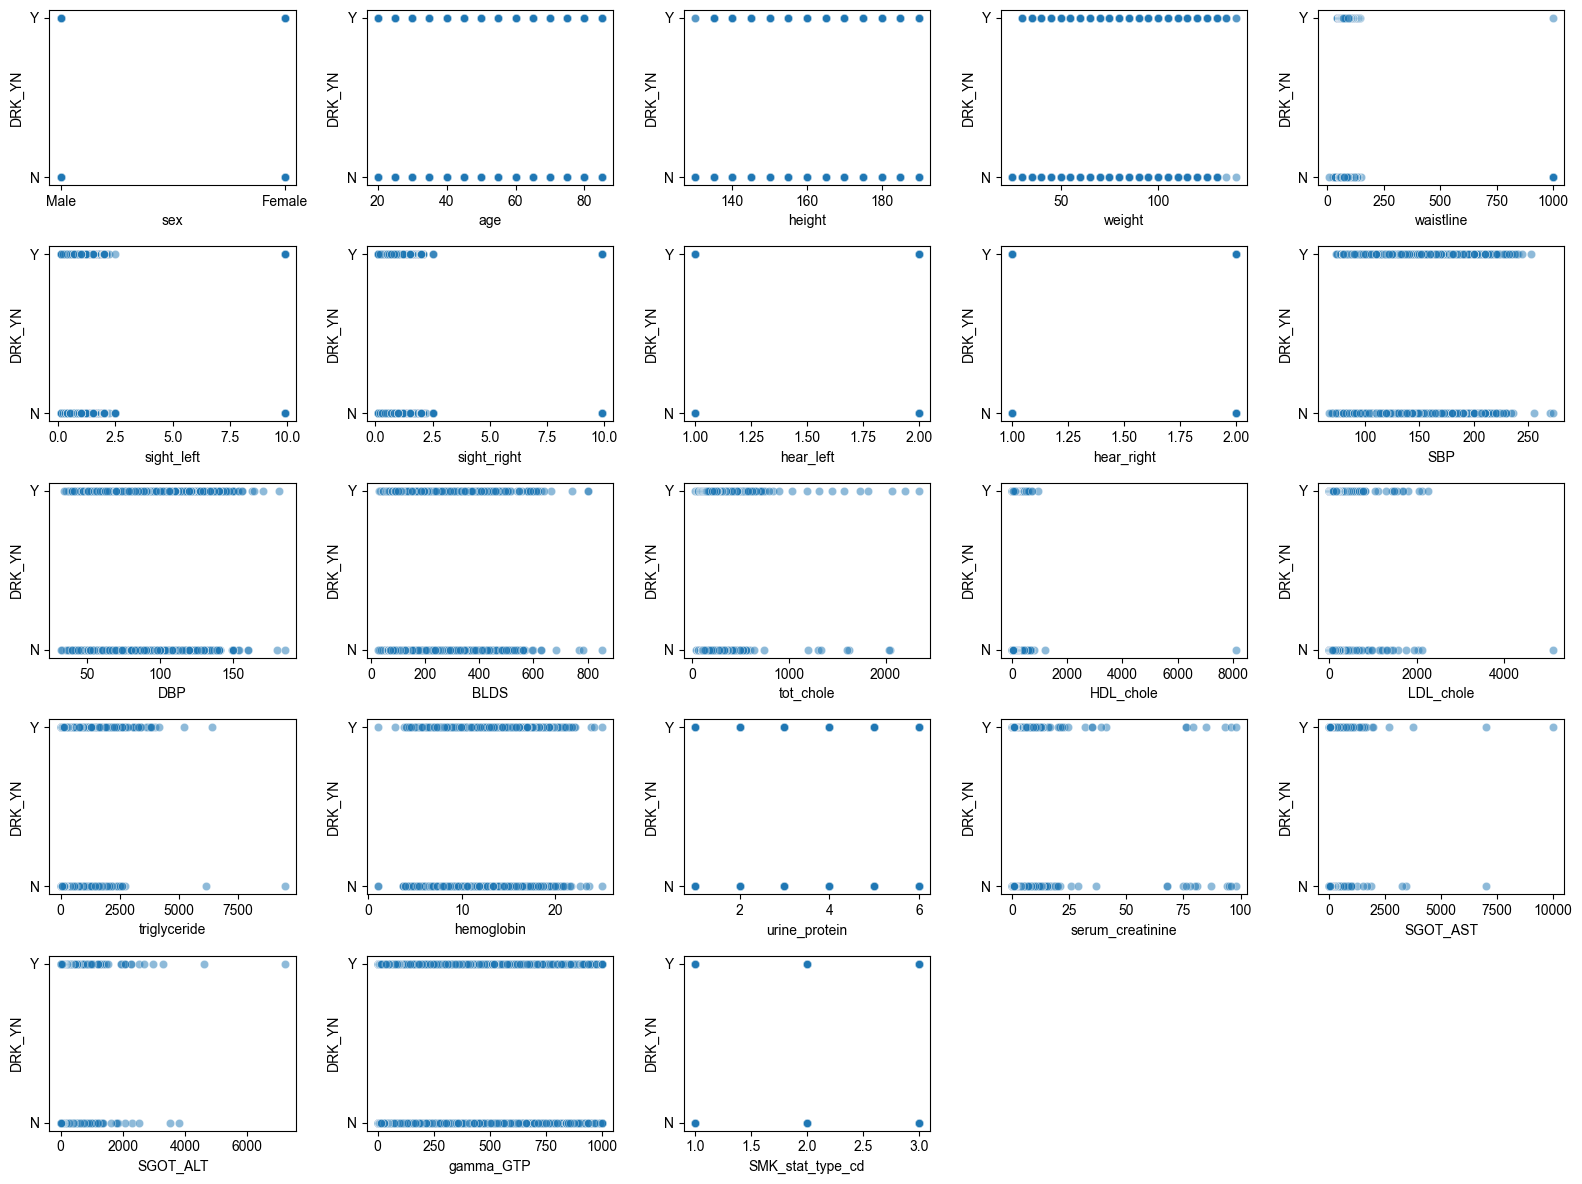

In [ ]:
columns_to_check = drinking_df.columns[:-1]

num_rows = 5
num_cols = 5

num_plots = min(len(columns_to_check), num_rows * num_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 12))

axes = axes.flatten()

sns.set(style="whitegrid")

for i in range(num_plots):
    column = columns_to_check[i]
    sns.scatterplot(
        data=drinking_df, x=column, y="DRK_YN", alpha=0.5, ax=axes[i]
    )
    axes[i].set_xlabel(column)
    axes[i].set_ylabel("DRK_YN")

for i in range(num_plots, num_rows * num_cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

To facilitate easier comparison of relationships across different independent variables, the plots are arranged in a structured layout. Empty subplots, if any, are hidden to maintain a clean and concise presentation. The style of the plots is set to "whitegrid," enhancing the clarity and aesthetics of the scatter plots.

The goal of the below matrix of histograms is to provide a visual representation of the data distribution for each independent variable.

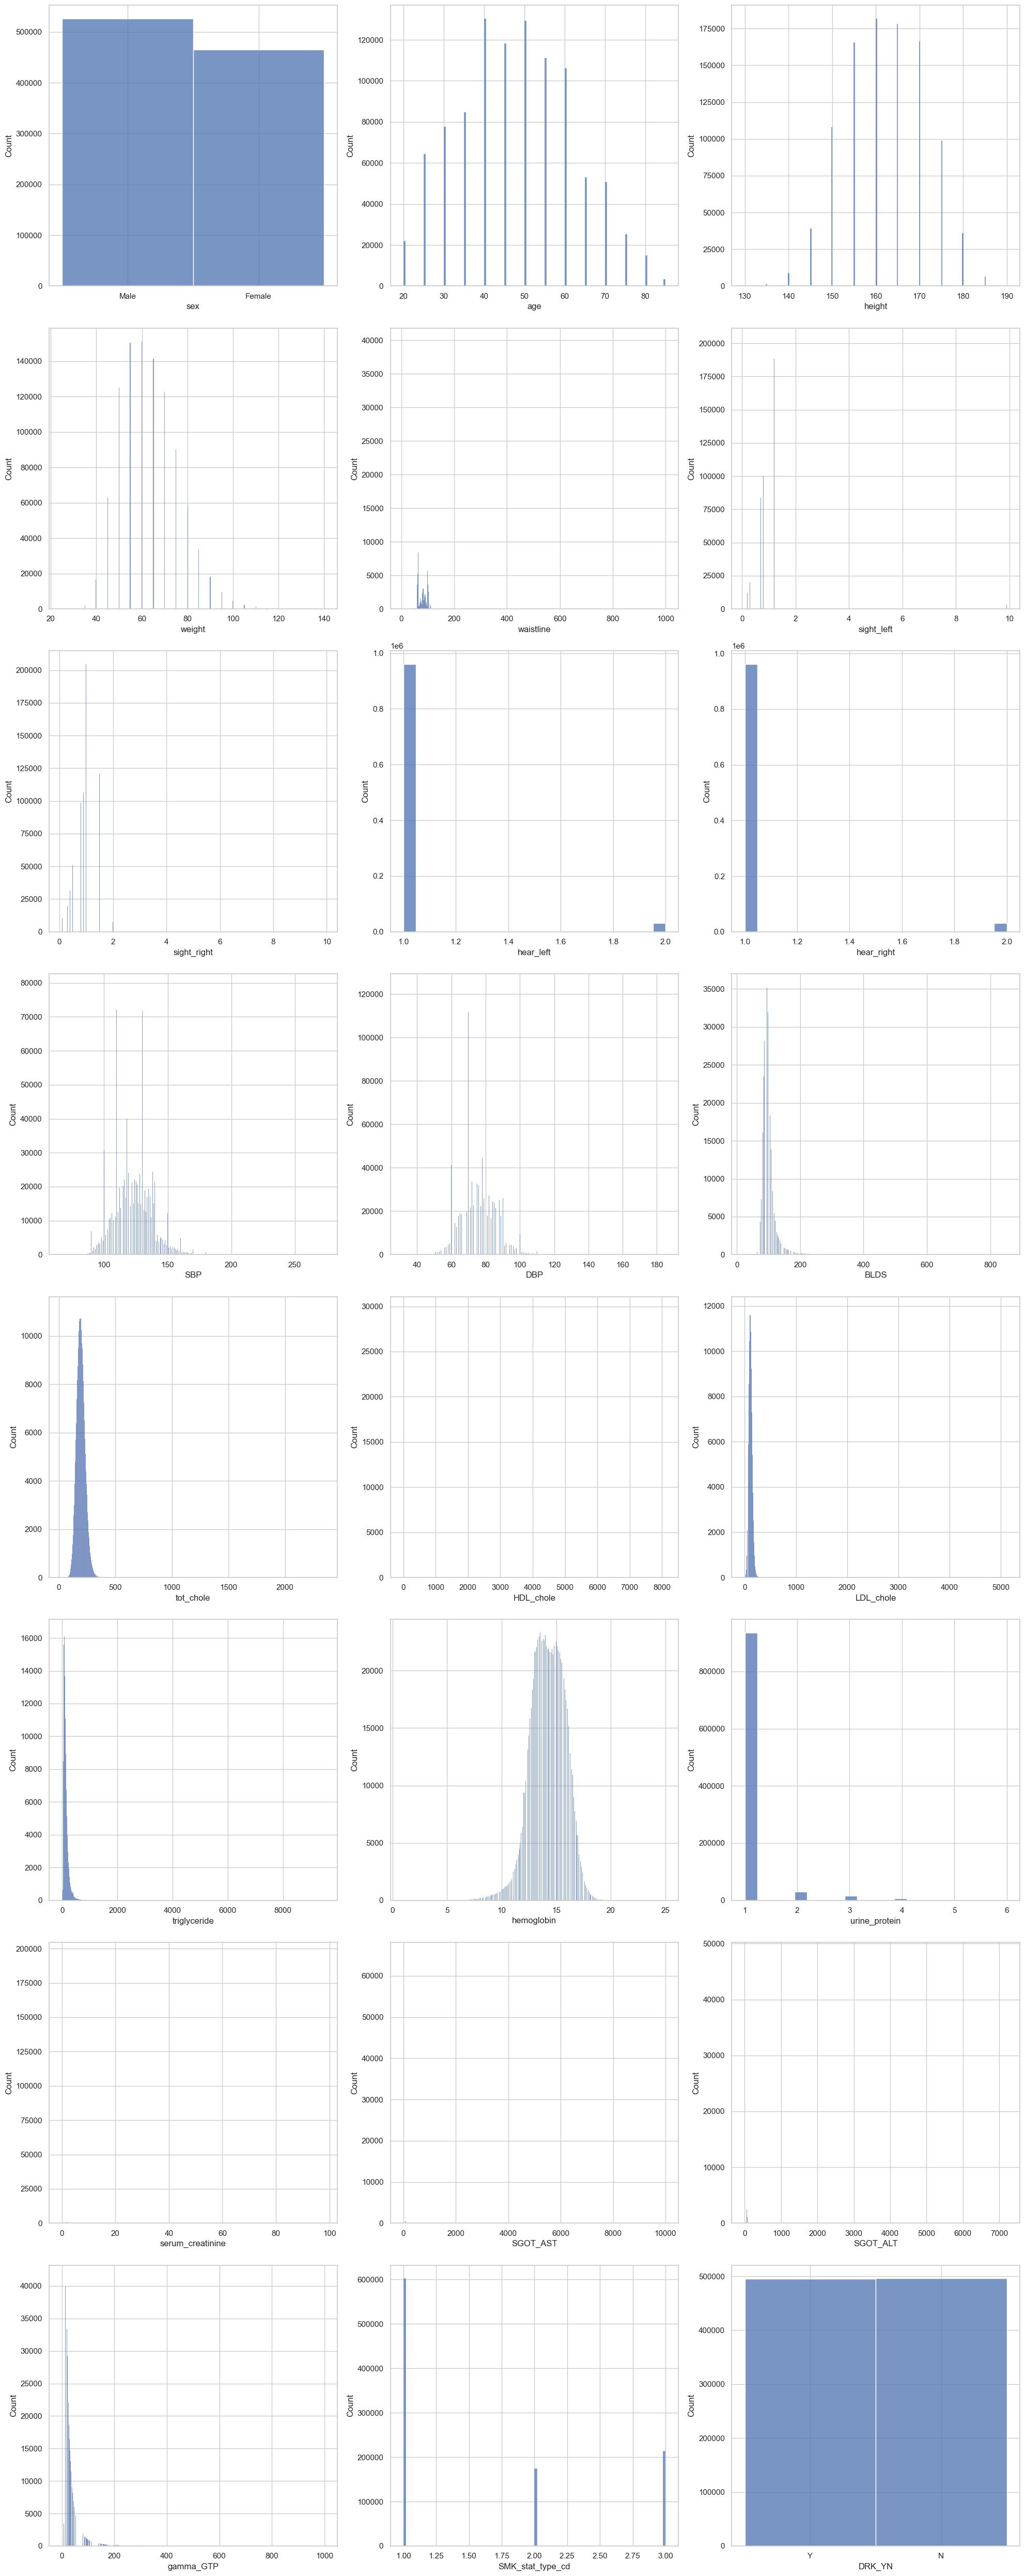

In [ ]:
columns_to_check = drinking_df.columns[0:]

num_rows = 8
num_cols = 3

num_plots = min(len(columns_to_check), num_rows * num_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 50))

axes = axes.flatten()

sns.set(style="whitegrid")

for i in range(num_plots):
    column = columns_to_check[i]
    sns.histplot(data=drinking_df, x=column, ax=axes[i])
    axes[i].set_xlabel(column)
    axes[i].set_ylabel("Count")

for i in range(num_plots, num_rows * num_cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

On first sight, it is pretty clear that the given dataset is not clean and contains outliers. Starting with the scatter plots, one can observe that the column ``waistline`` has outliers close to the values 1000. Further major outliers can be detected in the columns ``HDL_chole``, ``LDL_chole``, ``triglyceride``, and most of the other columns.

In Python, various methods are available to detect and manage outliers in a dataset. These methods play a crucial role in identifying and addressing data points that deviate significantly from the majority of the data. Outliers can distort statistical analyses and machine learning models, making their detection and handling essential in data preprocessing. Some possible methods to address these outliers include:

**Visualization Techniques**: Visual inspection of scatter plots, box plots, and histograms can reveal outliers by highlighting data points that deviate significantly from the expected patterns.

**Z-Score Method**: The Z-Score method is a statistical tool used to standardize and quantify the deviation of a data point from the mean of a dataset. It is calculated by subtracting the mean of the dataset from the individual data point and then dividing this difference by the standard deviation. This process results in a dimensionless score known as the Z-Score, which indicates how many standard deviations a data point is away from the mean. A Z-Score of 0 means the data point is exactly at the mean, while positive and negative Z-Scores represent data points above and below the mean, respectively. Typically, Z-Scores are used for outlier detection, with values significantly higher (greater than a predefined threshold) or lower (less than the negative of the threshold) suggesting potential outliers in the dataset. It provides a standardized way to assess and compare data points' deviations across different datasets, making it a versatile tool in statistical analysis and anomaly detection.

**IQR (Interquartile Range) Method**: The IQR (Interquartile Range) method is a robust statistical technique commonly used for identifying outliers in a dataset. It is based on the spread of data within the middle 50% of the dataset, which is defined by the IQR. To apply the IQR method, one first calculates the IQR by finding the difference between the third quartile (Q3) and the first quartile (Q1) of the dataset. Then, potential outliers are identified as any data points that fall below Q1 minus a specified multiple of the IQR or above Q3 plus the same multiple of the IQR. Typically, a common choice is to consider data points below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR as potential outliers, but the multiple can be adjusted to make the method more or less sensitive to outliers. The IQR method is especially useful when dealing with datasets that may contain skewed or non-normally distributed data, as it is less sensitive to extreme values than the Z-Score method. It is considered a robust method because it focuses on the central portion of the data distribution and is less influenced by outliers in the tails of the distribution.

**Winzorization**: Winzorization, also known as winsorizing, is a data preprocessing technique used to mitigate the impact of outliers in a dataset. The process involves replacing extreme values (outliers) with less extreme but still plausible values, often at the boundary of a predetermined range. To perform winsorization, you first specify a lower and upper boundary, typically based on percentiles (e.g., the 1st and 99th percentiles). Data points that fall below the lower boundary are replaced with the value at the lower boundary, while data points above the upper boundary are replaced with the value at the upper boundary. This helps in reducing the influence of outliers on statistical analyses and modeling, making the data more robust and less sensitive to extreme values.
Winsorization is particularly useful when you want to retain the general structure and distribution of your data while mitigating the effects of outliers. It allows you to preserve the overall shape of the data while minimizing the potential distortions caused by outliers, making it a valuable tool in situations where outliers may skew results or impact the validity of statistical analyses. However, it's essential to carefully choose the boundaries and consider the domain knowledge when applying winsorization, as it can affect the interpretation of the data and the results of subsequent analyses.

----
### Reasons to use Z-Scores:

Both z-scores and the Interquartile Range (IQR) method serve as valuable tools for outlier detection, but they have distinct characteristics that make one potentially more suitable than the other in specific situations.

Z-scores have the advantage of being a standardized measure that allows for straightforward comparison across different datasets and variables. They are especially useful when dealing with datasets that exhibit a roughly normal distribution and when you want to quantify how many standard deviations a data point is from the mean. Z-scores are versatile and applicable to a wide range of scenarios, making them a robust choice for many data analysis tasks.

On the other hand, the IQR method is less robust and flexible in comparison to z-scores. It focuses on the middle 50% of the data distribution, making it less sensitive to outliers in the tails of the distribution. While this can be advantageous in some cases, the IQR method may not perform well when dealing with data that doesn't conform to a roughly symmetric distribution. Additionally, the IQR method relies on percentile-based thresholds (e.g., 1.5 times the IQR) that may not always be the most appropriate choice for identifying outliers in all datasets. Therefore, the IQR method may not be as effective as z-scores in scenarios where a more standardized and versatile approach to outlier detection is needed.

#### Outlier detection with Z-Scores

In [ ]:
smoking_df_before_outlierD = drinking_df.shape[0]

columns_to_check = [
    "age",
    "height",
    "weight",
    "waistline",
    "sight_left",
    "sight_right",
    "SBP",
    "DBP",
    "BLDS",
    "tot_chole",
    "HDL_chole",
    "LDL_chole",
    "triglyceride",
    "hemoglobin",
    "serum_creatinine",
    "SGOT_AST",
    "SGOT_ALT",
    "gamma_GTP",
]

z_scores = (
    drinking_df[columns_to_check] - drinking_df[columns_to_check].mean()
) / drinking_df[columns_to_check].std()

# 3σ Standart deviation
threshold = 3
outliers = np.abs(z_scores) > threshold
outlier_columns = outliers.columns[outliers.any()]
drinking_df_cleaned = drinking_df[~outliers.any(axis=1)]

smoking_df_after_outlierD = drinking_df_cleaned.shape[0]

print(
    f"Due to the removal of outliers the amout of entries reduced from {smoking_df_before_outlierD} to {smoking_df_after_outlierD} by {smoking_df_before_outlierD - smoking_df_after_outlierD} entries."
)

Due to the removal of outliers the amout of entries reduced from 991320 to 904029 by 87291 entries.


### Visual comparision between original and cleaned data

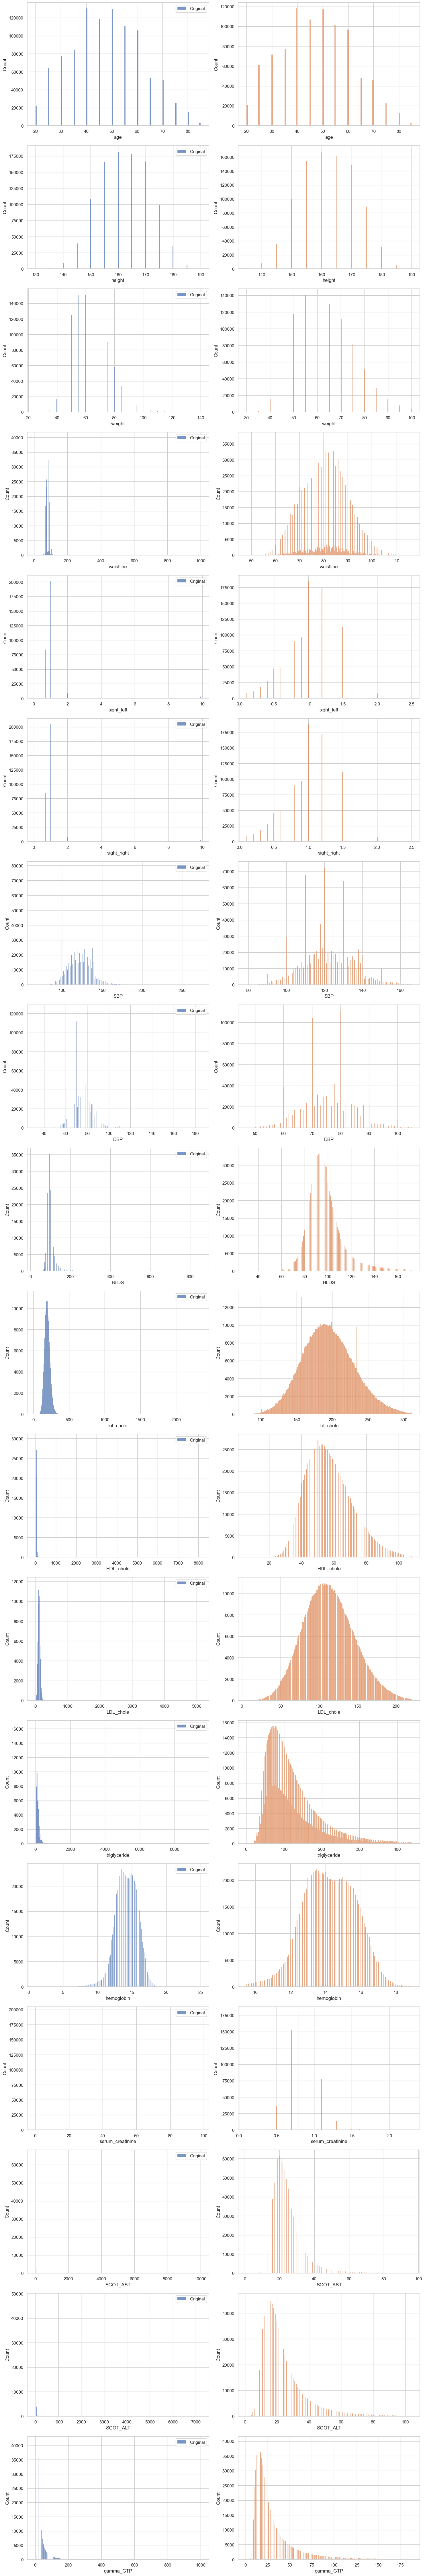

In [11]:
columns_to_check = [
    "age",
    "height",
    "weight",
    "waistline",
    "sight_left",
    "sight_right",
    "SBP",
    "DBP",
    "BLDS",
    "tot_chole",
    "HDL_chole",
    "LDL_chole",
    "triglyceride",
    "hemoglobin",
    "serum_creatinine",
    "SGOT_AST",
    "SGOT_ALT",
    "gamma_GTP",
]

num_rows = len(columns_to_check)
num_cols = 2

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

sns.set(style="whitegrid")

for i, column in enumerate(columns_to_check):
    sns.histplot(data=drinking_df, x=column, ax=axes[i, 0], label="Original")
    axes[i, 0].set_xlabel(column)
    axes[i, 0].set_ylabel("Count")

    sns.histplot(
        data=drinking_df_cleaned,
        x=column,
        ax=axes[i, 1],
        label="Cleaned",
        color=sns.color_palette()[1],
    )
    axes[i, 1].set_xlabel(column)
    axes[i, 1].set_ylabel("Count")

for ax in axes[:, 0]:
    ax.legend(loc="upper right")

for i in range(num_rows):
    for j in range(2, num_cols):
        fig.delaxes(axes[i, j])

plt.tight_layout()
plt.show()

Looking at the above histograms we see that the outlier detection and removal was successfull. Each plot looks now visually appealing and the overall distribution are visible unlike in some plots before the cleaning. Nevertheless, some atypical values are present in a subset of the plots. For example `DBP` and `SBP` have multiple spikes within their distribution. These spikes are likely to be caused by rounding since the spikes occur at f(x) = 10*n with n = ℕ. 

### Distinction of variable types

<img src="./level_of_measurements.png" alt="Your Image" width="300"/>

In data analysis and statistics, variable types are categorized into three main groups: Nominal, Ordinal, and Metric (also known as Interval or Ratio). These categories help us understand the nature of the data and determine appropriate statistical methods for analysis.

1. **Nominal Variables:** Nominal variables are categorical variables that represent distinct categories or labels with no inherent order. These categories are mutually exclusive and do not imply any quantitative difference. Examples of nominal variables include colors (e.g., red, green, blue), gender (e.g., male, female, non-binary), or types of fruits (e.g., apple, banana, orange). In nominal variables, you can't perform arithmetic operations like addition or subtraction because the categories have no numerical value.

2. **Ordinal Variables:** Ordinal variables, on the other hand, represent categories with a clear order or ranking but do not have a consistent numerical difference between them. The differences between ordinal categories are not mathematically meaningful. Examples of ordinal variables include education levels (e.g., high school, bachelor's, master's) or customer satisfaction ratings (e.g., very unsatisfied, unsatisfied, neutral, satisfied, very satisfied). While you can rank these categories, you can't say that the difference between "very unsatisfied" and "unsatisfied" is the same as the difference between "neutral" and "satisfied."

3. **Metric Variables:** Metric variables, also known as Interval or Ratio variables, are numeric variables with a meaningful order and consistent intervals between values. Interval variables have a meaningful order but no true zero point, while Ratio variables have both a meaningful order and a true zero point. Examples of interval variables include temperature in Celsius, where 20°C is not "twice as hot" as 10°C because zero doesn't represent the absence of temperature. Examples of ratio variables include age, income, or weight, where zero represents a meaningful absence of the variable (e.g., zero age means no age).

In [12]:
metric_cols = [
    "age",
    "height",
    "weight",
    "waistline",
    "sight_left",
    "sight_right",
    "SBP",
    "DBP",
    "BLDS",
    "tot_chole",
    "HDL_chole",
    "LDL_chole",
    "triglyceride",
    "hemoglobin",
    "serum_creatinine",
    "SGOT_AST",
    "SGOT_ALT",
    "gamma_GTP",
]
ordinal_cols = ["hear_left", "hear_right", "urine_protein", "SMK_stat_type_cd"]
nominal_cols = ["sex", "DRK_YN"]

print(f"Metric Columns: \n{metric_cols}")
print(f"\nOrdinal Columns: \n{ordinal_cols}")
print(f"\nNominal Columns: \n{nominal_cols}")

Metric Columns: 
['age', 'height', 'weight', 'waistline', 'sight_left', 'sight_right', 'SBP', 'DBP', 'BLDS', 'tot_chole', 'HDL_chole', 'LDL_chole', 'triglyceride', 'hemoglobin', 'serum_creatinine', 'SGOT_AST', 'SGOT_ALT', 'gamma_GTP']

Ordinal Columns: 
['hear_left', 'hear_right', 'urine_protein', 'SMK_stat_type_cd']

Nominal Columns: 
['sex', 'DRK_YN']


### 3.2 Metric Variables <a class='anchor' id='metric'></a>

The following visualizations create a grid of histograms (with overlaid Kernel Density Estimates - KDEs) to visualize and compare the distribution of a set of metric variables between two groups: drinkers and non-drinkers. It helps in understanding whether there are any significant differences or patterns in these variables between the two groups. 

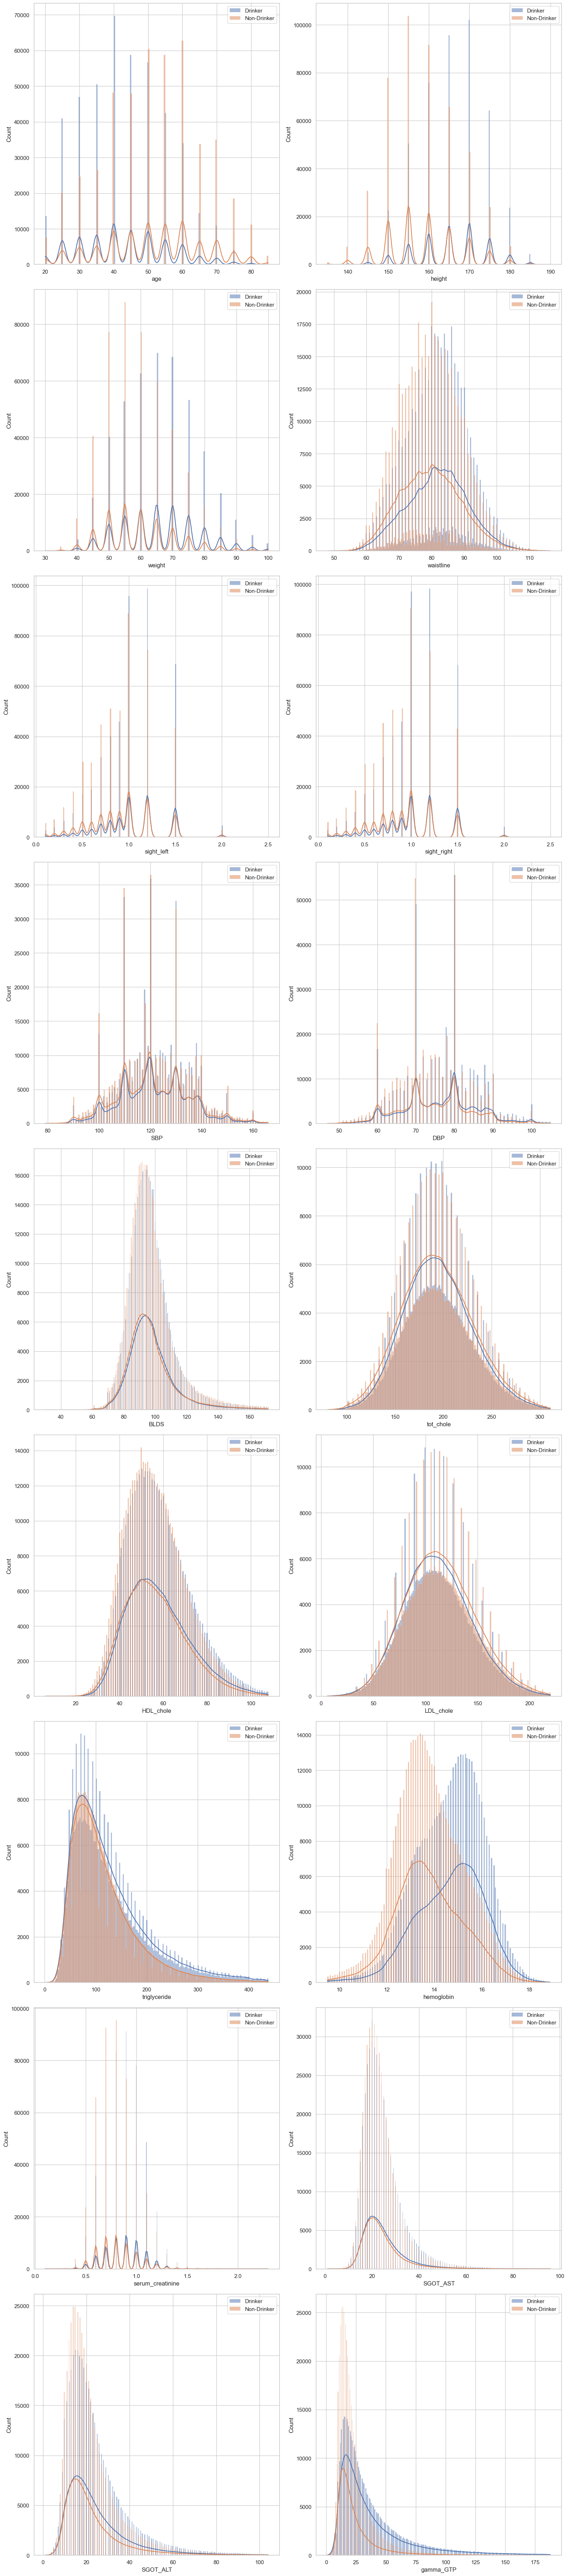

In [ ]:
num_rows = 9
num_cols = 2

num_plots = min(len(metric_cols), num_rows * num_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 72))

axes = axes.flatten()

sns.set(style="whitegrid")

for i in range(num_plots):
    column = metric_cols[i]

    drinkers = drinking_df_cleaned[drinking_df_cleaned["DRK_YN"] == "Y"]
    non_drinkers = drinking_df_cleaned[drinking_df_cleaned["DRK_YN"] == "N"]

    sns.histplot(drinkers[column], ax=axes[i], label="Drinker", kde=True)
    sns.histplot(
        non_drinkers[column], ax=axes[i], label="Non-Drinker", kde=True
    )

    axes[i].set_xlabel(column)
    axes[i].set_ylabel("Count")
    axes[i].legend()

for i in range(num_plots, num_rows * num_cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

### Observations:
1. It becomes evident that certain metric variables, such as age, height, and weight, exhibit a conspicuous rounding effect, appearing to be rounded to the nearest 5 years or centimeters. Intriguingly, the data suggests that alcohol consumption is more pronounced among individuals in the younger to middle age brackets compared to their older counterparts. This intriguing age-related trend prompts further investigation into whether social factors or generational influences play a role in shaping drinking behaviors.
2. Another captivating insight emerges as we explore the interplay between physical attributes and alcohol consumption. It appears that individuals who are taller and heavier are more inclined to consume alcohol than their shorter or lighter counterparts. This phenomenon raises the hypothesis that gender may exert an influence, with men, on average, being taller and heavier than women, possibly contributing to the observed differences in drinking patterns.
3. The trend observed in the waistline, while not as visually striking, does seem to follow a similar trajectory, where larger waistlines are associated with a higher likelihood of alcohol consumption. 
4. Metrics such as BLDS, tot_chole, and HDL_chole exhibit remarkable similarities between drinkers and non-drinkers. However, there is a subtle distinction in the case of LDL_cholesterol, which appears to be slightly elevated among non-drinkers. This finding suggests that the effect of alcohol on lipid profiles may not be uniform across all cholesterol components.
5. The elevation of triglyceride levels among drinkers hints at a potential link between alcohol consumption and alterations in lipid metabolism.
6. Hemoglobin levels reveal a fascinating bimodal distribution, with two distinct peaks. Given that hemoglobin levels tend to be more pronounced in males, this finding lends support to the hypothesis that gender dynamics could be intertwined with drinking behaviors.
7. The metrics SGOT_ALT and gamma_GTP display elevated values among participants who consume alcohol. These findings raise questions about the impact of alcohol on liver function and warrant additional investigations into the potential hepatotoxic effects of alcohol consumption.

### 3.3 Ordinal Variables <a class='anchor' id='ordinal'></a>


This code snippet creates a 2x2 grid of count plots to visualize and compare the distribution of categorical variables within different categories of individuals: drinkers and non-drinkers.

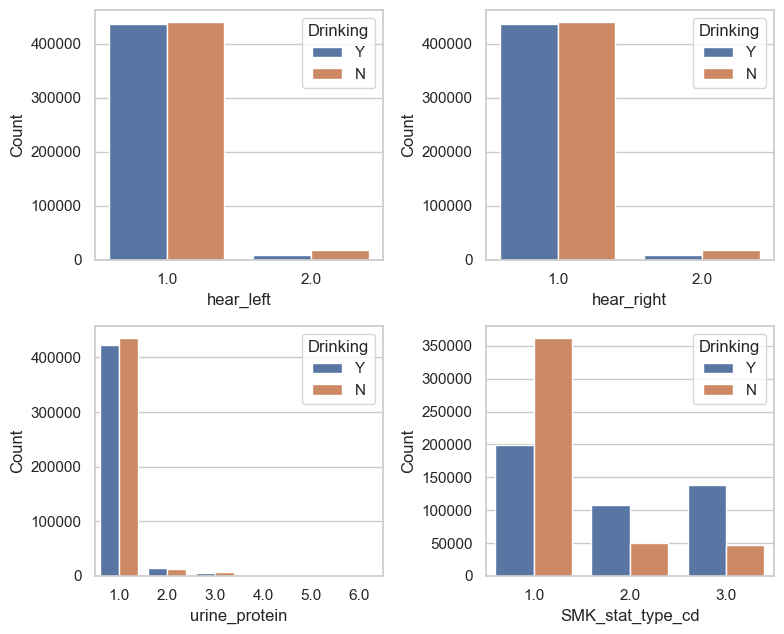

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(8, 6.5))
plt.subplots_adjust(hspace=0.5)

sns.set(style="whitegrid")

sns.countplot(
    data=drinking_df_cleaned, x="hear_left", hue="DRK_YN", ax=axes[0, 0]
)
axes[0, 0].set_xlabel("hear_left")
axes[0, 0].set_ylabel("Count")
axes[0, 0].legend(title="Drinking")

sns.countplot(
    data=drinking_df_cleaned, x="hear_right", hue="DRK_YN", ax=axes[0, 1]
)
axes[0, 1].set_xlabel("hear_right")
axes[0, 1].set_ylabel("Count")
axes[0, 1].legend(title="Drinking")

sns.countplot(
    data=drinking_df_cleaned, x="urine_protein", hue="DRK_YN", ax=axes[1, 0]
)
axes[1, 0].set_xlabel("urine_protein")
axes[1, 0].set_ylabel("Count")
axes[1, 0].legend(title="Drinking")

sns.countplot(
    data=drinking_df_cleaned, x="SMK_stat_type_cd", hue="DRK_YN", ax=axes[1, 1]
)
axes[1, 1].set_xlabel("SMK_stat_type_cd")
axes[1, 1].set_ylabel("Count")
axes[1, 1].legend(title="Drinking")

plt.tight_layout()
plt.show()

### Observations:
1. Participants in the study with abnormal hearing capabilities consume a higher quantity of alcohol. This observation may be attributed to various factors that could potentially influence their drinking habits. One possible explanation could be that individuals experiencing hearing abnormalities may resort to alcohol consumption as a coping mechanism, seeking temporary relief or distraction from their hearing-related challenges. It would be interesting to delve deeper into the underlying motivations and psychological aspects that drive this observed correlation between hearing impairments and increased alcohol consumption.

2. Individuals categorized with an SMK_stat_type_cd of 1.0, indicating they have never smoked, exhibit a nearly twofold higher likelihood of alcohol consumption. This intriguing finding suggests a significant association between smoking history and alcohol intake. While the exact causal relationship between these variables would require further investigation, it's possible that individuals who have never smoked might have different social or lifestyle factors influencing their alcohol consumption patterns.

### 3.4 Nominal Variables <a class='anchor' id='nominal'></a>

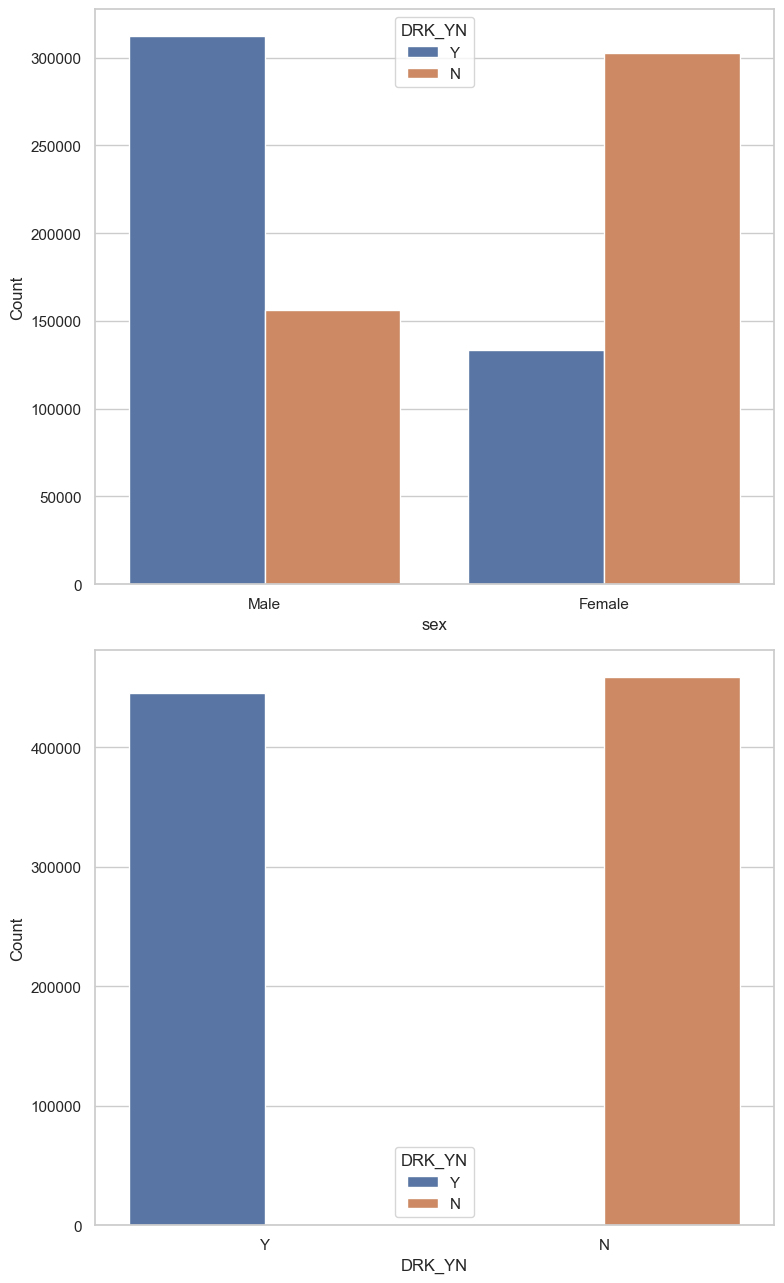

In [15]:
num_rows = len(nominal_cols)
num_cols = 1

fig, axes = plt.subplots(num_rows, num_cols, figsize=(8, 6.5 * num_rows))
plt.subplots_adjust(hspace=0.5)

sns.set(style="whitegrid")

for i, column in enumerate(nominal_cols):
    sns.countplot(data=drinking_df_cleaned, x=column, hue="DRK_YN", ax=axes[i])

    axes[i].set_xlabel(column)
    axes[i].set_ylabel("Count")

plt.tight_layout()
plt.show()

### Observations:
1. The chances of men consuming alcohol are more than twice as high as those of women. This stark gender-based disparity in alcohol consumption is a noteworthy finding from the data analysis. It suggests that there may be specific sociocultural, behavioral, or physiological factors at play that contribute to this significant difference.

2. The present data collection exhibits a nearly equal distribution between women and men participants. This balanced representation of genders in the study population is a positive aspect of the research design, as it ensures that the findings are not skewed by gender-related sampling biases. Such gender balance allows for more robust and reliable analyses and conclusions.

### 3.5 Correlations <a class='anchor' id='correlations'></a>

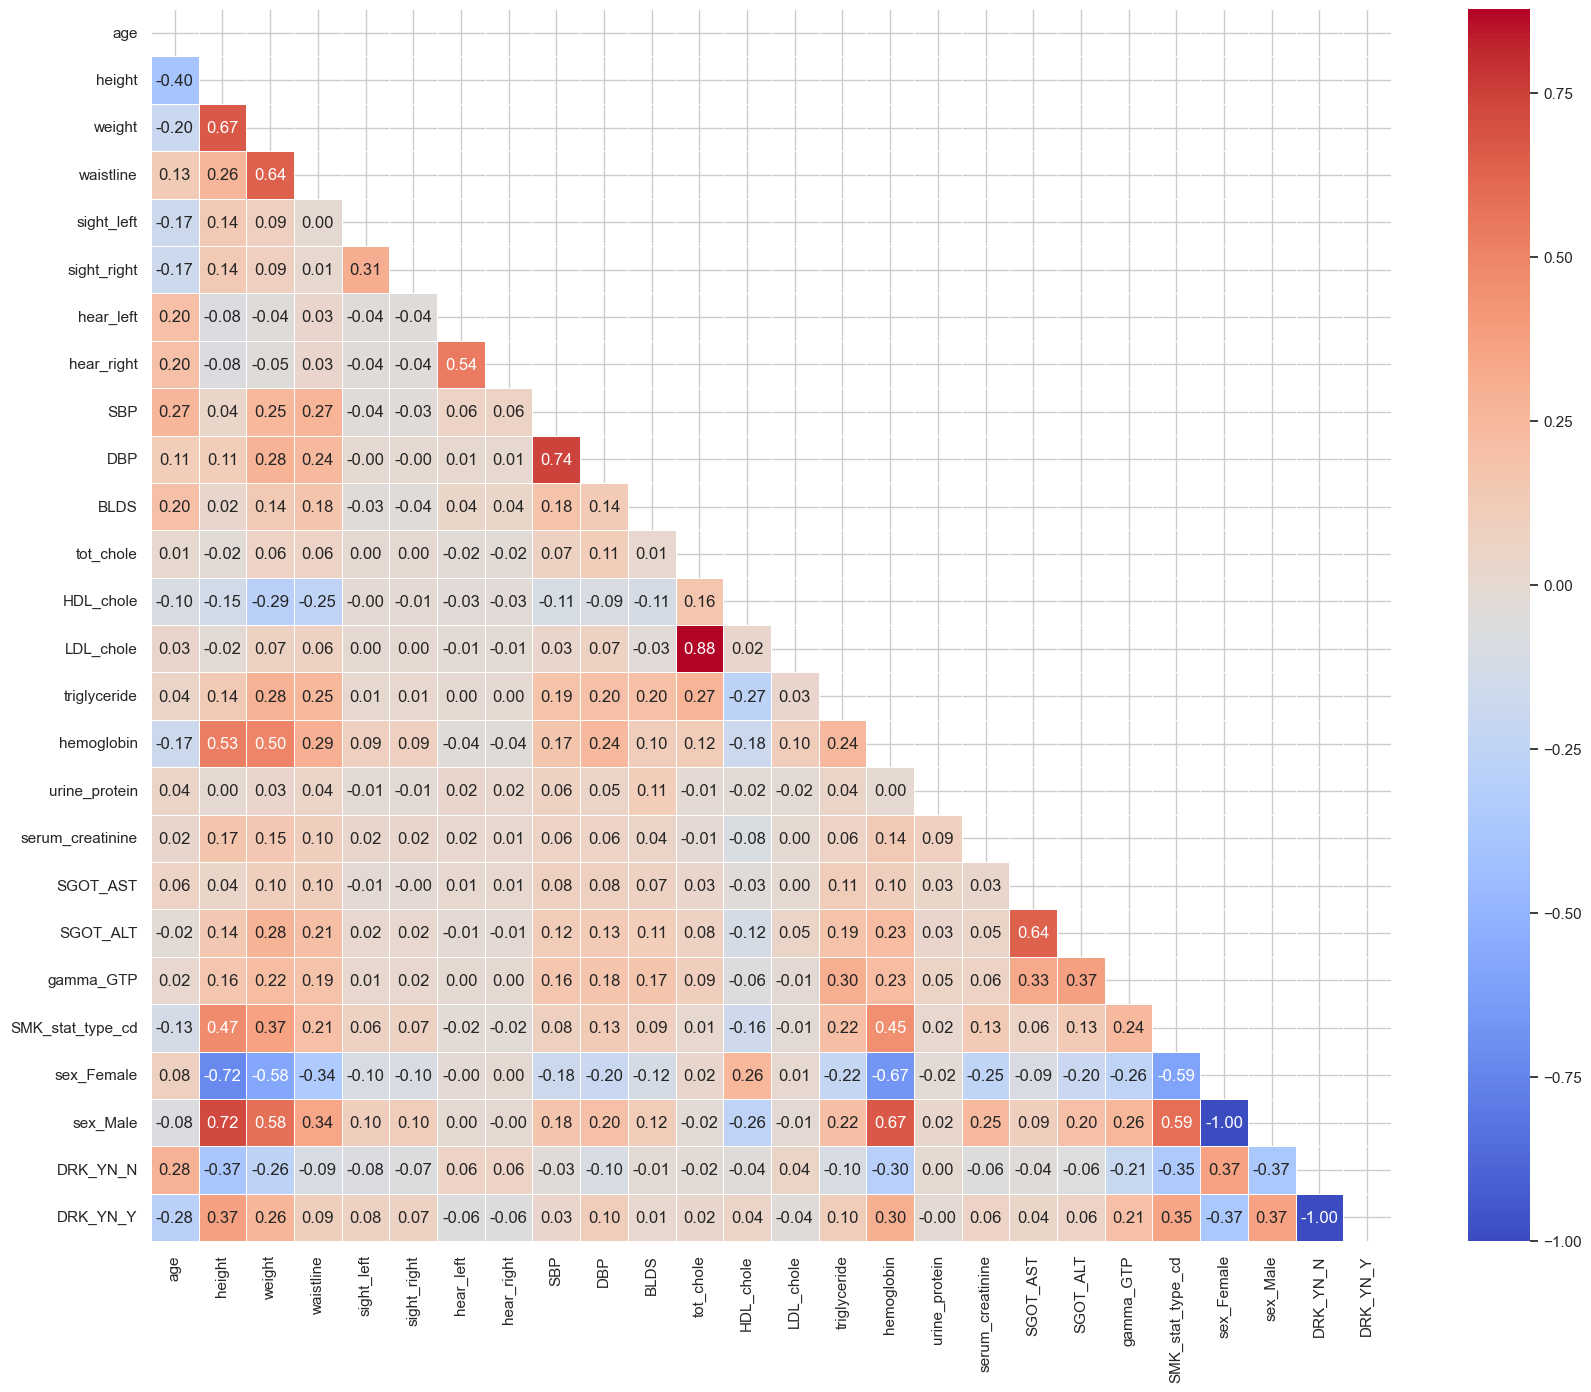

In [ ]:
dummy_smoking_df = pd.get_dummies(drinking_df, columns=["sex", "DRK_YN"])
correlation_matrix = dummy_smoking_df.corr()

mask = np.triu(correlation_matrix)

plt.figure(figsize=(20, 16))
sns.heatmap(
    correlation_matrix,
    cmap="coolwarm",
    linewidth=0.5,
    annot=True,
    fmt=".2f",
    mask=mask,
)
plt.show()

### 3.6 Which Matric for our dataset? <a class='anchor' id='metrics'></a>

When evaluating the performance of a predictive model for determining whether someone consumes alcohol or not, it's essential to consider multiple evaluation metrics to get a comprehensive view of the model's effectiveness. Four commonly used metrics for binary classification tasks are Accuracy, Recall, Precision, and F1 Score.

- **Accuracy**: Accuracy is a widely used metric that measures the proportion of correctly classified instances (both True Positives and True Negatives) out of all instances. It provides an overall view of how well the model is performing.

   $$\text{Accuracy} = \frac{\text{True Positives + True Negatives}}{\text{Total Predictions}}$$

- **Recall (Sensitivity)**: Recall, also known as Sensitivity or True Positive Rate, calculates the proportion of True Positives (correctly predicted drinkers) out of all actual drinkers. It helps identify how well the model is at capturing all positive cases.

   $$\text{Recall} = \frac{\text{True Positives}}{\text{True Positives + False Negatives}}$$

- **Precision**: Precision measures the proportion of True Positives (correctly predicted drinkers) out of all predicted positive instances. It helps assess the accuracy of positive predictions, focusing on minimizing false positives.

   $$\text{Precision} = \frac{\text{True Positives}}{\text{True Positives + False Positives}}$$

- **F1 Score**: The F1 Score is the harmonic mean of Precision and Recall. It is particularly useful when there is an imbalance between positive and negative classes. The F1 Score provides a balanced assessment of both Precision and Recall and is a valuable metric when you want to avoid bias towards false positives or false negatives.

   $$\text{F1 Score} = \frac{2 \times \text{Precision} \times \text{Recall}}{\text{Precision + Recall}}$$

### Conclusion

In the context of predicting alcohol consumption, the choice of evaluation metric depends on the specific goals and considerations of your application. However, the F1 Score stands out as a metric that strikes a balance between Precision and Recall, making it a suitable choice when you want to avoid favoring either false positives or false negatives.

While Accuracy provides an overall measure of correct predictions, it can be misleading when dealing with imbalanced datasets where one class significantly outweighs the other. In such cases, Precision and Recall become more critical, and the F1 Score combines these metrics effectively.

We will take the F1 Score to be on the safe side but accuracy would also be a great choise, because our drinking outcome is balanced. 


## 4. Gradient Boosting Explanation <a class='anchor' id='gradientbosting'></a> 

Gradient Boosting is a powerful ensemble learning technique in machine learning that has gained immense popularity for its ability to produce highly accurate predictive models. It belongs to the family of boosting algorithms, which focus on combining multiple weak learners (typically decision trees) to create a strong learner. Gradient Boosting works by sequentially adding decision trees to the ensemble, with each tree correcting the errors made by the previous ones. In the following part we will focus on the classification model, but there is also an regression model of Gradient Boosting. 

The target is to explain how trees are combined and evaluated. This allows us to then step deeper into how the trees are build when we talk about XGBoost.

To explain Gradient Boosting we use this simplified dataset: 
| Age | Smokes | **Drinks** | 
|:---:|:---:|:---:|
| 35 | yes | **yes** |
| 18 | no | **no** |
| 18 | yes | **yes** |
| 65 | no | **yes** |
| 25 | no | **yes** |
| 44 | no | **no** |

First we start with creating a single leaf which predicts our outcome. The initial leaf is created by the log(odds). After this we use another formula to make a probability out of the log(odds). Here an example: 

$$ log(odds) = \ln_{}(\frac{count(yes)}{count(no)}) = \ln_{}(\frac{4}{2}) = 0.6931 \approx{0.7}$$

$$ Probability =  \frac{e^{\ln_{}(\frac{4}{2})}}{1+e^{\ln_{}(\frac{4}{2})}} = 0.6667 \approx{0.7}$$

<br>
<div style="display: flex;">
  <img src="GradientBoosting0.png" alt="tree" width="128" height="45" style="float: left; margin-right: 10px;">
</div> 

After we calculated our initial leaf, which is used to get an initial prediction, we calculate Pseudo Residuals based on this initial prediction : $$ Residual = Observed Value - Predicted Value $$

This leads to this Residuals (first row includes formula):
| Age | Smokes | **Drinks** | Residual | 
|:---:|:---:|:---:|:---:|
| 35 | yes | **yes** | 1 - 0.7 = 0.3 |
| 18 | no | **no** | -0.7 |
| 18 | yes | **yes** | 0.3 |
| 65 | no | **yes** | 0.3 |
| 25 | no | **yes** | 0.3 |
| 44 | no | **no** | -0.7 |

In the next step a tree is build to predict the residuals. This is a simplyfied and possible tree: 

<div style="display: flex;">
  <img src="GradientBoosting1.png" alt="tree" width="640" height="360" style="float: left; margin-right: 10px;">
</div> 


The problem now is that we created the tree based on probabilities. To get later to our log(odds) we have to apply a transformation function to get correct output values. We apply it for the first leaf as example: 

$$ \frac{\sum Residual_i}{\sum [PreviousProbability_i * (1-PreviousProbability_i)]} $$

$$ OutputValueFirstLeaf = \frac{\sum -0.7}{\sum [0.7 * (1-0.7)]} = -3.3 $$ 

As Result we get this tree with these calculated output values: 
<div style="display: flex;">
  <img src="GradientBoosting2.png" alt="tree" width="640" height="420" style="float: left; margin-right: 10px;">
</div> 


To calculate our new log(odds) we scale our output values with a learning rate and add it to our previous log(odds). The learning rate controls the step size at which the model adjusts to errors. A smaller learning rate makes the learning process slower but often leads to better accuracy, while a larger learning rate makes it faster but may risk overfitting. It's a crucial hyperparameter that balances learning speed and model performance. It is also easier to for the algorithm to react to errors by using a lower learning rate. The formula is: 

$$ log(odds) Prediction = previousLog(odds) + learningRate * output values $$

Here is an example how the new probabilities are calculated: 

$$ log(odds) Prediction = 0.7 + 0.1 * -3.3 = 0.37 $$

$$ Probability = \frac{e^{0.37}}{1+e^{0.37}} = 0.59 $$

Here is a new table with the new probabilities, which lead as well to new residuals: 

| Age | Smokes | **Drinks** | Probabilities | Residual | Last Residual |
|:---:|:---:|:---:|:---:|:---:|:---:|
| 35 | yes | **yes** | 0.84 | 0.16 | 0.3 |
| 18 | no | **no** | 0.59 | - 0.59 | -0.7 |
| 18 | yes | **yes** | 0.84 | 0.16 | 0.3 |
| 65 | no | **yes** | 0.68 | 0.32 | 0.3 |
| 25 | no | **yes** | 0.68 | 0.32 | 0.3 |
| 44 | no | **no** | 0.68 | -0.68 | -0.7 |

Based on the new residuals new trees will be created until a specific number of trees (n_estimators) is reached. The goals is again to predict the residuals and based on this also improving the residuals from tree to tree. 

Do not forget that this little Dataset is only an example and very hard to fit because of the low amount of Data. 

<div style="display: flex;">
  <img src="GradientBoosting3.png" alt="tree" width="1280" height="550" style="float: left; margin-right: 10px;">
</div> 


The final probabilities of new data is calucalated with this formula: 

$$ log(odds) Prediction = \ln(odds)_0 + \sum_{i=1}^{n_{estimators}} learingRate * OutputValue_i $$ 

$$ Probability = \frac{e^{log(odds) Prediction}}{1+e^{log(odds) Prediction}} $$


## 5. XGBoost Explanation <a class='anchor' id='xgb'></a>

XGBoost is correctly called Extreme Gradient Boosting. This name includes that XGBoost is based on Gradient Boosting. The **extreme** improvement is made in the way how XGBoost builds the trees. XGBoost still uses the residuals to create a new tree and it also combines mutltiple unique trees scaled by a learning rate like Gradient Boosting. The Learning rate in XGBoost is called $\eta$ (eta). 

To explain how XGBoost is build we use this simplyfied dateset: 

| Age | **Drinks** | Initial Prediction |
|:---:|:---:|:---:|
| 35 | **yes** | 0.5 |
| 24 | **yes** | 0.5 |
| 18 | **no** | 0.5 |
| 65 | **no** | 0.5 |

If we want to build a tree we first start with a single leaf which contains all residuals. The initial residuals are calculated in the same way as in Gradient Boosting, leading to the formation of the first leaf of the tree.

<div style="display: flex;">
  <img src="XGBoost1.png" alt="tree" width="128" height="45" style="float: left; margin-right: 10px;">
</div> 

After creating new leafs we always calculate the Similarity Score for the leafs and the Gain based on the leafs' Similarity Score. 

$$ Similarity Score = \frac{(\sum Residual_i)²}{\sum [PreviousProbability_i * (1-PreviousProbability_i)] + \lambda } $$

<br>

The Similarity Score for our leaf is 0 because $(\sum Residual_i)²$ is 0. Special for XGBoost is the $\lambda$ parameter. This is a regularization parameter which reduces the sensitivity to isolated observations. Based on the Similarity Score usually the Gain is calculated with this formula: 

$$ Gain = Left_{Similarity} + Right_{Similarity} - Root_{Similarity} $$ 

As you can see, it is only possible to calculate the Gain for nodes. With the Gain it is possible to evaluate the effectiveness of the selected node condition. For instance let's set a root node condition. 

<div style="display: flex;">
  <img src="XGBoost2.png" alt="tree" width="426" height="200" style="float: left; margin-right: 10px;">
</div> 

Now we can calculate the Similarity Score for the leafs and then the Gain of our root node. In our case, to simplify, we set $\lambda$ to 0 : 

$$ Similarity Score_{right} = \frac{(0.5+0.5-0.5)²}{0.5 * (1 - 0.5) + 0.5 * (1 - 0.5) + 0.5 * (1 - 0.5) + 0 } = 0.33$$
$$ Similarity Score_{left} = \frac{(-0.5)²}{0.5 * (1 - 0.5) + 0} = 1$$

Based on this we can calculate the Gain (the higher the better):

$$ Gain = 1 + 0.33 - 0 = 1.33$$ 

In our example we can easily see that our condition for the root node is the most fitting one. Usually XGBoost trys every option as node condition or uses the Greedy Algorithm which we will discuss later. For our example we assume that we directly have the best option. As result the next node would lead to this tree: 

<div style="display: flex;">
  <img src="XGBoost3.png" alt="tree" width="426" height="240" style="float: left; margin-right: 10px;">
</div> 

The Gain of the new node would be this: 

$$ Gain = 1 + 2 - 0.33 = 2.66$$ 

To avoid overfitting XGBoost uses a score called Cover. If the Cover score for a leaf is lower than 1 (default value) XGBoost doesn't allow those leafs. This has the effect that it can't be to precise and XGBoost has to find better node conditions to classify more values with one node. The Cover is calculated with this formula: 

$$ Cover = \sum [PreviousProbability_i * (1-PreviousProbability_i)] $$

$$ Cover_{BottomLeftLeaf} = \sum 0.5 * (1-0.5) = 0.25$$

In our case the cover is always to low because the example dataset is to small. In regards to the small dataset we allow all Covers which are greater than 0.

Another parameter to avoid overfitting is gamma. $\gamma$ is used to make sure that the Gain of our nodes is high enough so that we get a minimum of information out of the conditions. If Gain - $\gamma$ is lower than 0 the algorithm prunes the node. For pruning XGBoost always starts in the lowest leafs. XGBoost continious pruning until the Gain is high enough. Let's assume $\gamma$ = 2 and we change the threshold of the second node : 

<div style="display: flex;">
  <img src="XGBoost4.png" alt="tree" width="1280" height="400" style="float: left; margin-right: 10px;">
</div> 

<br>
In this case we first get the Gain 0 because the new threshold of the red colored node isn't able to devide it better than before. As result we get a negative values till we pruned the tree to the intial leaf. Nevertheless, let' switch back to our good result, which we don't have to prune.

<div style="display: flex;">
  <img src="XGBoost5.png" alt="tree" width="480" height="300" style="float: left; margin-right: 10px;">
</div> 

Don't forget $\lambda$ has also an impact to this pruning because it reduces the Gain of leafs with few predicted residuals. 

If we want to calculate the output values of the tree. It is equal to Gradient Boosting. We only add $\lambda$: 

$$ \frac{\sum Residual_i}{\sum [PreviousProbability_i * (1-PreviousProbability_i)] + \lambda} $$

To obtain new predictions and compute residuals for the next unique tree, we follow the same process as in the Gradient Boosting phase.

At least one thing is unclear, because searching for every possible threshold for our nodes is very time consuming. To be faster we use the Approximate Greedy Algorithm. This algorithm splits our data into a specific amount of quantiles. After splitting those quantile boardes are used to evaluate the threshold for the nodes. To split the quantiles more effective we calculate a weight for each values. For this our cover formula is used. Then we try to split the data into quantiles which all contains the same sum of weights like in this picture: 

<div style="display: flex;">
  <img src="XGBoost7.png" alt="tree" width="1280" height="250" style="float: left; margin-right: 10px;">
</div> 

To be even more effecient we can split the data to our threads. Then each thread can calculate the sum of weights for their split. At least the result can be easily merged into an histogramm which can be used to set the quantiles.

<div style="display: flex;">
  <img src="XGBoost6.png" alt="tree" width="1280" height="350" style="float: left; margin-right: 10px;">
</div> 

In summary, XGBoost enhances the Gradient Boosting algorithm with efficient tree construction, regularization, pruning, and optimization techniques, making it a popular choice for various machine learning tasks.

Source: [StatQuest YouTube Channel](https://www.youtube.com/@statquest)


## 6. XGBoost Implementation <a class='anchor' id='implementation'></a>

We want to predict the column 'DRK_YN' which describes if someone drink alcohole or do not drinkt alcohole. First we have to encode Y and N to 1 and 0. This is needed for the XGBoost model.

In [17]:
df_x, df_y = (
    drinking_df_cleaned.drop("DRK_YN", axis=1),
    drinking_df_cleaned[["DRK_YN"]],
)

df_y["DRK_YN"] = df_y["DRK_YN"].replace({"Y": 1, "N": 0})

XGBoost has the ability to deal with categorical values. To use this ability we have to cast them to the type 'category'.

In [18]:
cats = df_x.select_dtypes(exclude=np.number).columns.tolist()

for col in cats:
    df_x[col] = df_x[col].astype("category")

We split the data into a common distribution of 70% for training and 30% for testing. We use random_state to set the seed for the random partitioning, ensuring that we get the same random partitioning each time we run the code. However, to prevent any bias introduced by the initial order of the data, we set shuffle to True, which randomizes the order of the data before splitting.

Additionally, we use stratify to make sure that the distribution of our target variable is preserved in both the training and testing sets. This is particularly important for classification tasks or when dealing with imbalanced datasets, as it ensures that each class is represented proportionally in the splits.

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df_x, df_y, test_size=0.3, random_state=1, stratify=df_y, shuffle=True
)

Parameters:

- `tree_method`: Devides Between CPU and GPU acceleration.
- `n_estimators`: Number of boosting rounds.
- `learning_rate`: Step size shrinkage used to prevent overfitting.
- `max_depth`: Maximum depth of each tree.
- `min_child_weight`: Minimum sum of instance weight (hessian) needed in a child.
- `subsample`: Fraction of samples used for fitting the trees.
- `colsample_bytree`: Fraction of features used for fitting the trees.
- `gamma`: To prune low Gains.
- `reg_lambda`: L2 regularization term on weights.
- `objective`: Learning task and objective function ( 'binary:logistic' for binary classification and 'multi:softmax' for multi-class classification).
- `eval_metric`: Metric used for evaluation ('logloss' for binary classification and 'mlogloss' for multi-class classification).
- `random_state`: Seed for reproducibility.
- `enable_categorical`: Enables the model to interact with categorical featueres. (later added)

You can adjust these parameters based on your specific multiclass classification problem and dataset requirements.
Some parameters we already described in the explanation.

In [20]:
params_xgb = {
    "tree_method": "gpu_hist",
    "n_estimators": 200,
    "learning_rate": 0.1,
    "max_depth": 5,
    "min_child_weight": 1,
    "subsample": 1.0,
    "colsample_bytree": 1.0,
    "gamma": 2,
    "reg_lambda": 1,
    "objective": "binary:logistic",
    "eval_metric": "logloss",
    "random_state": 0,
}

Now it's time to initialize the model and fit it to the data training data. At least we use the fitted model to predict the our target. To get the time for our comparison afterwards we need to track the time for the training duration. 

In [21]:
import xgboost as xgb
import time

start_time_xgb = time.time()

clf = xgb.XGBClassifier(**params_xgb, enable_categorical=True)
clf.fit(X_train, y_train)

end_time_xgb = time.time()
execution_time_xgb = end_time_xgb - start_time_xgb

predictions_xgb = clf.predict(X_test)

In this code snippet, we're computing the F1 score for a machine learning model's predictions (predictions) compared to the true target values (y_test).

In [22]:
from sklearn.metrics import f1_score

f1_xgb = f1_score(y_test, predictions_xgb)

print("F1 Score: ", f1_xgb)

F1 Score:  0.7322410482954016


## 7. Experiments <a class='anchor' id='experiments'></a>

For hyperparameter tuning and experiment tracking we use the library Optuna. This is a python framework which can support us in those tasks. To use Optuna we have to create an objective function which can train our model automatically. To keep track about the several training runs we pass the trail object from Optuna. This object logs parameters and chooses the parameters based on selectable state of the art hyperopt algorithms. In our case we use the standart Tree-Structured Parzen Estimator to calulate the best parameter combinations.
<br>
**Tree-Structured Parzen Estimators (TPE)**

TPE is a method for finding the best hyperparameters for machine learning models, especially when hyperparameters are interrelated, such as the number of layers and neurons in a neural network or different optimizers with their parameters.

The core idea behind TPE is quite different from Bayesian optimization. Instead of modeling the probability of model performance (y) given hyperparameters (x), TPE focuses on modeling the probability of hyperparameters (x) given model performance (y) and the overall probability of model performance (y).

Here's how TPE works:

1. **Initial Random Sampling**: TPE begins by randomly sampling hyperparameter combinations to explore the search space.

2. **Splitting into Groups**: It divides the observed data into two groups: the best-performing group (upper quartile) and the remaining group. The separation value is denoted as y*.

3. **Modeling Probability**: TPE models the probability of being in each group (best or the rest) for each hyperparameter combination. It uses Parzen estimators, a simple averaging technique centered on existing data points, to estimate these probabilities.

4. **Modeling Overall Probability**: Additionally, TPE models the overall probability distribution of model performance (p(y)), which helps in understanding how likely a particular level of performance is.

5. **Using Bayes' Rule**: TPE combines these probabilities using Bayes' rule to find the ratio of the probability of improvement, known as expected improvement (EI), for each hyperparameter combination.

6. **Selecting the Next Point**: The hyperparameter combination with the highest expected improvement is chosen as the next point to evaluate. This point is expected to provide the most significant improvement in model performance.

7. **Tree Structure**: The "tree-structured" aspect in TPE's name aligns with the structure of the hyperparameters. It takes into account the hierarchical nature of hyperparameters.

8. **Drawback**: One limitation of TPE is that it may not capture interactions between hyperparameters as effectively as some other methods, such as Gaussian processes.

In essence, TPE efficiently explores hyperparameter combinations by modeling their probability of effectiveness given the model's performance. This balance between exploration and exploitation makes TPE a valuable tool for optimizing machine learning models.

<br><br>

![TPE](tpe.gif)

Source: [Medium Reference](https://medium.com/criteo-engineering/hyper-parameter-optimization-algorithms-2fe447525903)



In [ ]:
import optuna


def objective(trial):
    params = {
        "objective": "binary:logistic",
        "eval_metric": "logloss",
        "tree_method": "gpu_hist",  # GPU acceleration (if available),
        "n_estimators": trial.suggest_int("n_estimators", 50, 2000),
        "learning_rate": trial.suggest_uniform("learning_rate", 0.01, 0.25),
        "max_depth": trial.suggest_int("max_depth", 1, 12),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 7),
        "subsample": trial.suggest_uniform("subsample", 0.75, 1.0),
        "colsample_bytree": trial.suggest_uniform(
            "colsample_bytree", 0.75, 1.0
        ),
        "gamma": trial.suggest_uniform("gamma", 0, 3),
        "reg_lambda": trial.suggest_uniform("reg_lambda", 1, 10),
    }

    clf = xgb.XGBClassifier(**params, enable_categorical=True)
    clf.fit(X_train, y_train)

    predictions = clf.predict(X_test)

    f1 = f1_score(y_test, predictions)

    return f1

These two lines create an Optuna study to find the best hyperparameters for a machine learning model. It will maximize the F1 score by trying out different hyperparameter settings in 200 trials by applying our objective function.

In [24]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=200)

[I 2023-10-10 02:22:13,251] A new study created in memory with name: no-name-02fc2c2e-4d89-46fa-9f3b-8f6ad7abc533
[I 2023-10-10 02:22:14,378] Trial 0 finished with value: 0.7191418222346058 and parameters: {'n_estimators': 143, 'learning_rate': 0.2146700277506883, 'max_depth': 1, 'min_child_weight': 1, 'subsample': 0.8965036680324221, 'colsample_bytree': 0.9921900001006322, 'gamma': 0.6928728887048021, 'reg_lambda': 5.745810592368256}. Best is trial 0 with value: 0.7191418222346058.
[I 2023-10-10 02:22:20,116] Trial 1 finished with value: 0.7223951987726186 and parameters: {'n_estimators': 1327, 'learning_rate': 0.042111747149418975, 'max_depth': 1, 'min_child_weight': 6, 'subsample': 0.809819730981844, 'colsample_bytree': 0.9693999082523986, 'gamma': 1.0585373812295127, 'reg_lambda': 9.882391831076337}. Best is trial 1 with value: 0.7223951987726186.
[I 2023-10-10 02:22:21,646] Trial 2 finished with value: 0.7315537160552645 and parameters: {'n_estimators': 71, 'learning_rate': 0.0679

### Gaining Insights for Possible Retraining

When conducting hyperparameter tuning experiments, it's crucial to examine the results to gain insights and potentially improve model performance through retraining. These visualization tools help you analyze and understand your experiments:

1. **Optimization History Plot (`plot_optimization_history`):**
   - This plot provides a historical view of how the optimization process evolved over the trials.
   - It helps you see how in our case F1 changed during the optimization, showing if the model's performance improved over time.
<br><br>

2. **Parameter Importances Plot (`plot_param_importances`):**
   - This plot displays the importances of each hyperparameter in influencing the optimization results.
   - It helps you understand which hyperparameters had the most impact on improving the model's performance.
<br><br>

3. **Parallel Coordinate Plot (`plot_parallel_coordinate`):**
   - This plot visualizes how different combinations of hyperparameters affect the F1 score(at least in our case).
   - It allows you to identify patterns or trends among hyperparameter values that lead to better or worse model performance.


In [25]:
from optuna.visualization import plot_optimization_history

plot_optimization_history(study)

In [26]:
from optuna.visualization import plot_param_importances

plot_param_importances(study)

In [27]:
from optuna.visualization import plot_parallel_coordinate

plot_parallel_coordinate(study)

As result we get the best parameters to predict the F1 Score as good as possible.

In [28]:
best_params = study.best_params
best_f1 = study.best_value

print("Best Hyperparameters:", best_params)
print("Best F1 Score:", best_f1)

Best Hyperparameters: {'n_estimators': 1257, 'learning_rate': 0.023652922810962637, 'max_depth': 4, 'min_child_weight': 3, 'subsample': 0.8544430217270526, 'colsample_bytree': 0.9120644633119265, 'gamma': 0.5074508718587356, 'reg_lambda': 2.771762591459049}
Best F1 Score: 0.733301093668626


Now we train the model with our tuned parameters. 

In [29]:
clf = xgb.XGBClassifier(**best_params, enable_categorical=True)
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)

f1 = f1_score(y_test, predictions)

print(f"This is our F1 Score after tuning: {f1}")

This is our F1 Score after tuning: 0.733201389870611


Now, we will assess the performance of our machine learning model using key evaluation tools: the classification report, confusion matrix, and feature importance analysis. These methods provide valuable insights into the model's performance, allowing us to make informed decisions and refine our approach.

The classification report provides a comprehensive summary of the model's performance, including metrics like precision, recall, F1-score, and support for each class. It helps us understand how well the model is at correctly identifying different classes and where it may be making errors.

In [30]:
from sklearn.metrics import classification_report

class_report = classification_report(y_test, predictions)

print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.73      0.74    137625
           1       0.73      0.74      0.73    133584

    accuracy                           0.74    271209
   macro avg       0.74      0.74      0.74    271209
weighted avg       0.74      0.74      0.74    271209



The confusion matrix gives a detailed breakdown of true positives, true negatives, false positives, and false negatives, allowing us to visualize the model's performance on a class-by-class basis. It's particularly valuable for understanding the types of errors the model is making and identifying areas for improvement.

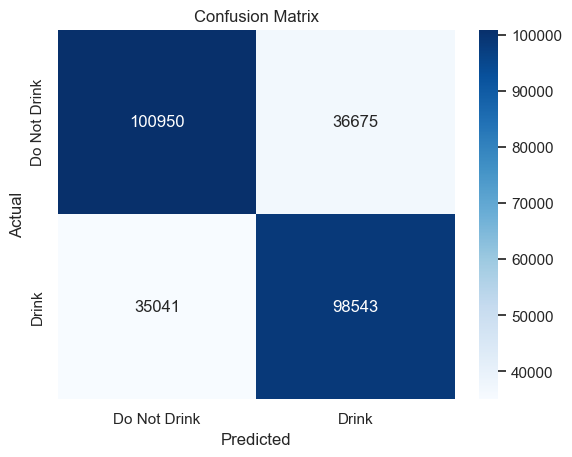

In [31]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predictions)

class_labels = ["Do Not Drink", "Drink"]

sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=class_labels,
    yticklabels=class_labels,
)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

plt.show()

Feature importance analysis helps us identify which input features have the most significant impact on the model's predictions. This insight can guide feature selection and engineering efforts, improving model interpretability and potentially reducing overfitting. The F-Score is the count how often a feature is overall used as threshold in our unique trees. 

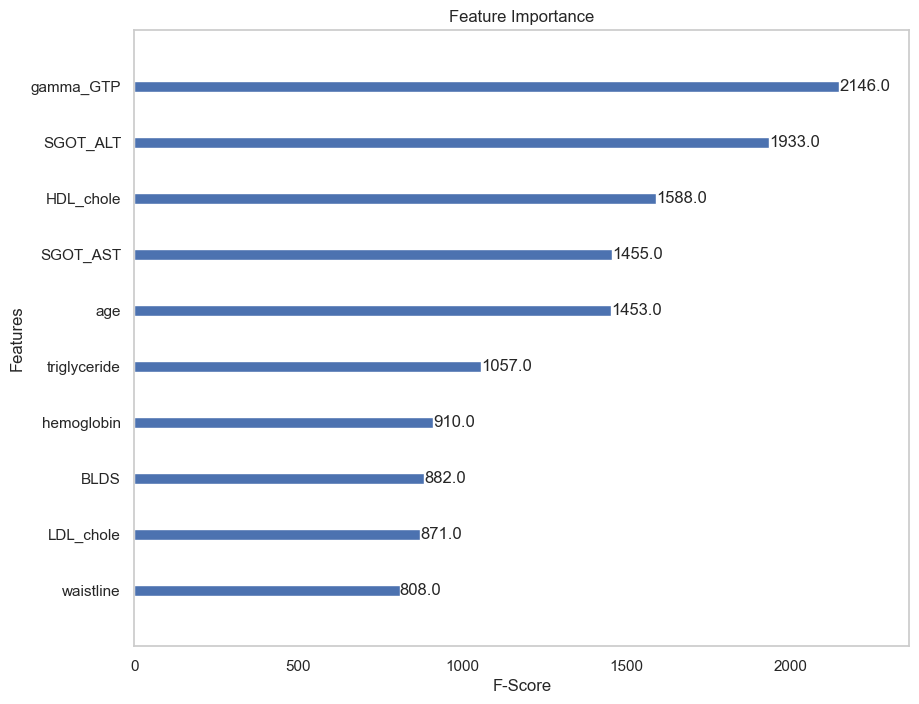

In [32]:
xgb.plot_importance(
    clf,
    importance_type="weight",
    title="Feature Importance",
    xlabel="F-Score",
    ylabel="Features",
    grid=False,
    show_values=True,
    max_num_features=10,
)

fig = plt.gcf()
fig.set_size_inches(10, 8)

plt.show()

## 8. Comparison <a class='anchor' id='comparison'></a>

In this comparison, we'll take a closer look at [XGBoost](https://xgboost.readthedocs.io/en/stable/ "XGBoost"), [LightGMB](https://lightgbm.readthedocs.io/en/stable/  "LightGBM"), and [CatBoost](https://catboost.ai/ "CatBoost")—three widely used gradient boosting algorithms—highlighting their advantages and limitations for practical use. Although it's clear that the direct one-to-one comparisons of the untuned models may not constitute a perfect match, they are still sufficient to identify the trends and strengths across the libraries.

### 8.1. LightGBM <a class='anchor' id='LightGBM'></a>

LightGBM which stands for Light Gradient Boosting Maschine is another powerful gradient boosting framework. 
Its designed to perform with large datasets and has become a preferred choice for various use cases, including classification, regression, and ranking tasks.
LightGBM is an open-source project started by Microsoft. It uses leaf-wise (vertical) growth, while XGBoost uses by default level-wise (horizontal) growth. That could lead to a faster training and potentially higher accuracy but a greater risk of overfitting.\
\
![leaf-wise vs. level-wise growth](https://miro.medium.com/v2/resize:fit:636/format:webp/1*knXLSHDplNMbBCrOrWcb-Q.png)


LightGBM uses a histogram-based approach for splitting data, which allows it to work faster by reducing memory usage and speeding up training times. Furthermore LightGBM uses the GOSS-Technique which allows to use only a small fraction of the full dataset.\
\
In the next section we will provide some parameters to adjust the LightGBM model with nearly the same settings as the untuned XGBoost Model.

In [33]:
lgb_params = {
    "boosting_type": "gbdt",  # Equivalent to 'tree_method': 'gpu_hist' in XGBoost
    "num_leaves": 31,  # Equivalent to 'max_depth': 3 in XGBoost
    "learning_rate": 0.1,
    "n_estimators": 200,  # Equivalent to 'n_estimators' in XGBoost
    "objective": "binary",  # Equivalent to 'objective': 'binary:logistics' in XGBoost
    "metric": "logloss",  # Equivalent to 'eval_metric': 'logloss' in XGBoost
    "random_seed": 0,
}

Unfortunely the parameters cant fit exactly. That leads to a slight deviation in between the three frameworks. For example it is often assumed that the maximum depth of a tree in XGBoost is comparable to the number of leaves in a tree in LightGBM. However, this is a rough assumption because the internal mechanisms and algorithms in both frameworks are different. The parameters were nevertheless adapted as best as possible.\
\
Re-splitting the data into training and test data using "lgb.Dataset" in the following section is used to provide the data in a format that can be used by LightGBM for training and evaluating the gradient boosting model.

In [34]:
import lightgbm as lgb

train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

To determine how long LightGBM takes for the training we have to import and use the library ["time"](https://docs.python.org/3/library/time.html#module-time "time")\
While measuring time, we initialize the model and train it using the training data. Afterwards, we test it and record the outcomes.

In [ ]:
start_time_lgb = time.time()

clf_lgb = lgb.train(lgb_params, train_data)

end_time_lgb = time.time()
execution_time_lgb = end_time_lgb - start_time_lgb

probabilities_lgb = clf_lgb.predict(
    X_test, num_iteration=clf_lgb.best_iteration
)

[LightGBM] [Info] Number of positive: 311695, number of negative: 321125
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.024926 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1927
[LightGBM] [Info] Number of data points in the train set: 632820, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.492549 -> initscore=-0.029805
[LightGBM] [Info] Start training from score -0.029805


We need to convert the raw predictions into a list of predicted class labels, which is necessary to evaluate model performance and obtain predictions in a classified format.
After this we can determine the F1-Score of our model.

In [36]:
predictions_lgb = (probabilities_lgb > 0.5).astype(int)
f1_lgb = f1_score(y_test, predictions_lgb)

print("F1 Score (LightGBM):", f1_lgb)

F1 Score (LightGBM): 0.7318264344804705


### 8.2. CatBoost <a class='anchor' id='CatBoost'></a>

![Alt Text](https://media.giphy.com/media/vFKqnCdLPNOKc/giphy.gif)

CatBoost which stands for Categorial Boost is another powerful gradient boosting framework known for its efficiency and robustness in various machine learning tasks. It´s also designed to handle large datasets especially for categorial features.

Similar to LightGBM and XGBoost, CatBoost is also an open-source project, actively maintained and enhanced by the developer community. While both LightGBM and XGBoost offer flexibility in terms of growth strategies, CatBoost has its unique strengths.

One of CatBoost's notable features is its ability to handle categorical features naturally, without requiring extensive preprocessing. CatBoost's default strategy, is to growth a balanced tree, its a combination of leaf-wise and level-wise growth. This approach may lead to longer training durations. 

In the cells below, we will provide the same settings to initialize our CatBoost Model.

In [37]:
catboost_params = {
    "iterations": 200,  # Equivalent to "n_estimators" in XGBoost
    "learning_rate": 0.1,
    "depth": 3,  # Equivalent to "max_depth" in XGBoost
    "min_data_in_leaf": 1,  # Equivalent to "min_child_weight" in XGBoost
    "max_bin": 255,
    "l2_leaf_reg": 0,  # Equivalent to "reg_alpha" in XGBoost
    "colsample_bylevel": 1.0,  # Equivalent to "colsample_bytree" in XGBoost
    "eval_metric": "Logloss",
    "loss_function": "Logloss",
    "random_seed": 0,
}

The categorical features in "df_x" are identified and stored in the list "cb_features". This is necessary because CatBoost provides specialized support for categorical features, and they need to be explicitly specified as such. We'll proceed with the rest just like in LightGBM before.

In [ ]:
from catboost import CatBoostClassifier

cb_features = [
    col_idx
    for col_idx, col_dtype in enumerate(df_x.dtypes)
    if col_dtype == "category"
]

start_time_cb = time.time()

clf_cb = CatBoostClassifier(cat_features=cb_features, **catboost_params)
clf_cb.fit(X_train, y_train)

end_time_cb = time.time()
execution_time_cb = end_time_cb - start_time_cb

predictions_cb = clf_cb.predict(X_test)

0:	learn: 0.6694630	total: 191ms	remaining: 38s
1:	learn: 0.6506739	total: 222ms	remaining: 22s
2:	learn: 0.6356679	total: 254ms	remaining: 16.7s
3:	learn: 0.6227391	total: 284ms	remaining: 13.9s
4:	learn: 0.6118364	total: 315ms	remaining: 12.3s
5:	learn: 0.6029884	total: 346ms	remaining: 11.2s
6:	learn: 0.5957773	total: 375ms	remaining: 10.3s
7:	learn: 0.5889056	total: 408ms	remaining: 9.79s
8:	learn: 0.5841490	total: 439ms	remaining: 9.31s
9:	learn: 0.5797569	total: 470ms	remaining: 8.92s
10:	learn: 0.5758491	total: 500ms	remaining: 8.6s
11:	learn: 0.5724443	total: 532ms	remaining: 8.33s
12:	learn: 0.5690392	total: 563ms	remaining: 8.09s
13:	learn: 0.5664164	total: 593ms	remaining: 7.87s
14:	learn: 0.5643328	total: 621ms	remaining: 7.67s
15:	learn: 0.5622352	total: 650ms	remaining: 7.47s
16:	learn: 0.5603292	total: 682ms	remaining: 7.34s
17:	learn: 0.5586327	total: 711ms	remaining: 7.19s
18:	learn: 0.5570940	total: 742ms	remaining: 7.07s
19:	learn: 0.5556755	total: 772ms	remaining: 6

After our model is trained, we can determine the F1-Score. 

In [39]:
f1_cb = f1_score(y_test, predictions_cb, average="weighted")

print("F1 Score: (CatBoost)", f1_cb)

F1 Score: (CatBoost) 0.7323335823248037


### 8.3. Evaluation <a class='anchor' id='evaluation'></a>

To compare these three models and to get a good overview of the features offered by each model, this table from [joinplank](https://www.joinplank.com/articles/xgboost-catboost-lightgbm "joinplank") provides us a comprehensive overview.

|   | XGBoost | CatBoost | LightGBM |
|----------|----------|----------|----------|
| Number of Parameters  | +50  | +110  | +130  |
| Handles Categorial  | No  | Yes  | Yes  |
| Number of metrics  | 25  | 67  | 23 |
| Handles custom metrics  | Yes | Yes  | Yes  |
| Supports multiple metrics  | No |  Yes  | Yes  |
| Boosting types  | 3  | 2  | 4  |
| Feature importances  | 3 types  | 3 types  | 2 types  |
| Community posts  | large community  | few posts  | nice community  |
| Regression  | Yes  | Yes  | Yes  |
| Multiregression | - | Yes | - |
| Classification | Yes | Yes | Yes |
| Multiclass Classification | Yes (conditional) | Yes | Yes |
| Multilable Classification | No | Yes | Yes |
| Ranking | Yes | Yes | Yes |

After initializing the three models, we perform an evaluation to compare their performance characteristics in terms of accuracy, speed, and robustness untuned.

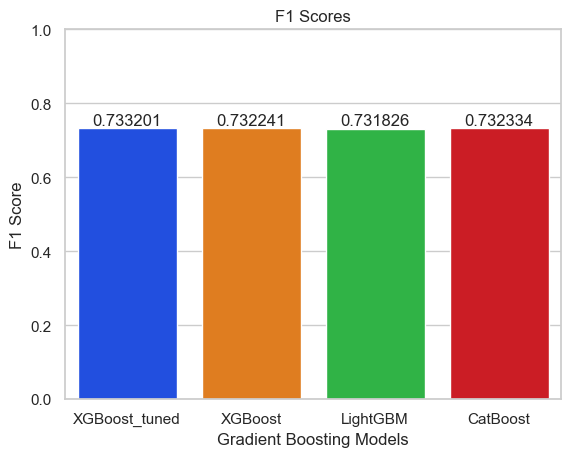

In [40]:
models = ["XGBoost_tuned", "XGBoost", "LightGBM", "CatBoost"]
f1_scores = [f1, f1_xgb, f1_lgb, f1_cb]

ax_f1 = sns.barplot(x=models, y=f1_scores, palette="bright")

plt.xlabel("Gradient Boosting Models")
plt.ylabel("F1 Score")
plt.title("F1 Scores")
plt.ylim(0, 1.0)

for i, v in enumerate(f1_scores):
    ax_f1.text(i, v, f"{v:.6f}", ha="center", va="bottom", fontsize=12)

plt.show()

**XGBoost tuned:** Unfortunately, the tuning process didn't perform as well as we had hoped.

**XGBoost:** XGBoost is reliable but cautious. It tries to avoid making mistakes, even if it means missing some correct predictions.

**LightGBM:** LightGBM is speedy and good at spotting subtle patterns. It leans towards catching more correct predictions while still being reasonably precise.

**CatBoost:** CatBoost is user-friendly and precise and has only a few correct predictions better compared to LightGBM (in this case).

It is important to note that all models (exept our tuned XGBoost model) are untuned. The slight score differences may caused by their different default settings and technologies.

While the F1 Score is a helpful metric that provides an overall assessment of a classifier's performance, it's essential to assess both precision and recall separately. Additionally, considering the macro average of precision and recall provides a more balanced evaluation, especially when dealing with imbalanced datasets.

In [41]:
report_xg = classification_report(y_test, predictions_xgb)
print("Classification Report for XGBoost:\n", report_xg, "\n")

report_lgb = classification_report(y_test, predictions_lgb)
print("Classification Report for LightGBM:\n", report_lgb, "\n")

report_cb = classification_report(y_test, predictions_cb)
print("Classification Report for CatBoost:\n", report_cb, "\n")

Classification Report for XGBoost:
               precision    recall  f1-score   support

           0       0.74      0.74      0.74    137625
           1       0.73      0.74      0.73    133584

    accuracy                           0.74    271209
   macro avg       0.74      0.74      0.74    271209
weighted avg       0.74      0.74      0.74    271209
 

Classification Report for LightGBM:
               precision    recall  f1-score   support

           0       0.74      0.73      0.74    137625
           1       0.73      0.73      0.73    133584

    accuracy                           0.73    271209
   macro avg       0.73      0.73      0.73    271209
weighted avg       0.73      0.73      0.73    271209
 

Classification Report for CatBoost:
               precision    recall  f1-score   support

           0       0.74      0.73      0.73    137625
           1       0.72      0.74      0.73    133584

    accuracy                           0.73    271209
   macro avg  

If we look at the differences on these classification reports the classification reports show very similar performance metrics for the two classes:

**Precision:** All three models have a precision of approximately 0.74 for class 0 and 0.72 for class 1. This indicates that when they predict an instance as class 0 or class 1, they are correct about 74% of the time for class 0 and 72% of the time for class 1.

**Recall:** The recall values are also similar, around 0.72-0.74 for class 0 and 0.72-0.74 for class 1. This means that the models are able to correctly identify about 72-74% of the actual instances of class 0 and class 1.

**Accuracy:** The overall accuracy for all models is around 0.73, indicating that they correctly classify about 73% of the total instances.

**Macro-Avg:** The macro average is fairly similar to the summarized values. 

Afterwards we are creating and visualize the confusion matrices to gain insights into the model's performance by visualizing how well it correctly predicts different classes.

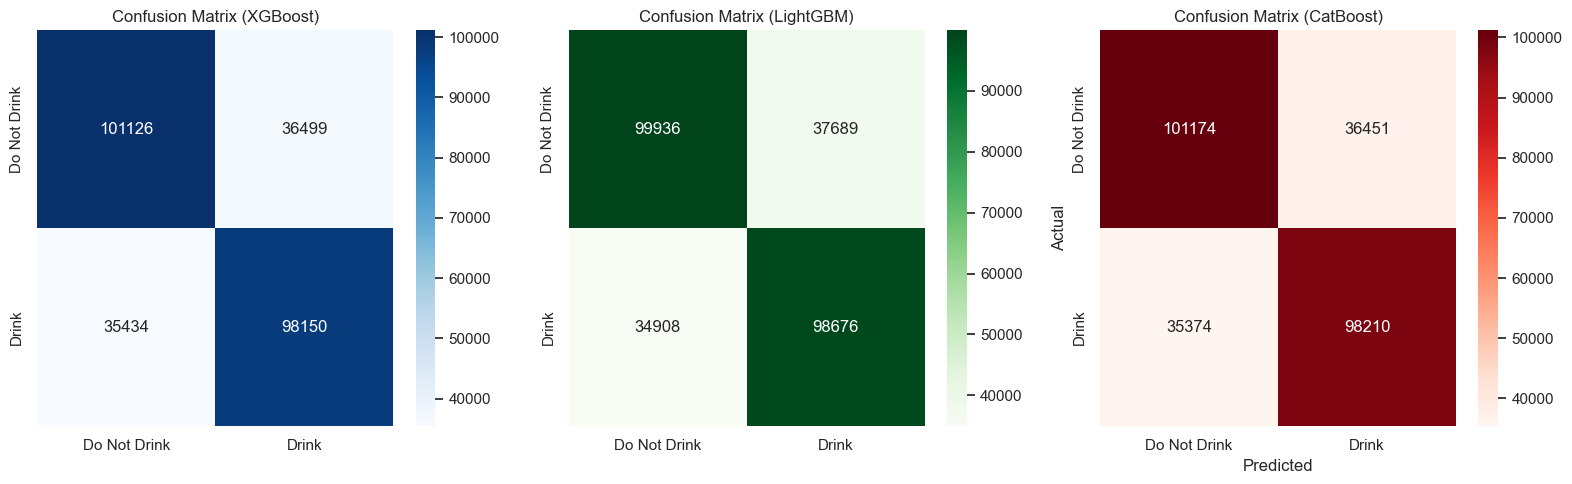

In [42]:
cm_lgb = confusion_matrix(y_test, predictions_lgb)
cm_cb = confusion_matrix(y_test, predictions_cb)
cm_xgb = confusion_matrix(y_test, predictions_xgb)

class_labels = ["Do Not Drink", "Drink"]
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# XGBoost
sns.heatmap(
    cm_xgb,
    annot=True,
    fmt="d",
    cmap="Reds",
    xticklabels=class_labels,
    yticklabels=class_labels,
    ax=axes[2],
)
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")
axes[0].set_title("Confusion Matrix (XGBoost)")

# LightGBM
sns.heatmap(
    cm_lgb,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=class_labels,
    yticklabels=class_labels,
    ax=axes[0],
)
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")
axes[1].set_title("Confusion Matrix (LightGBM)")

# CatBoost
sns.heatmap(
    cm_cb,
    annot=True,
    fmt="d",
    cmap="Greens",
    xticklabels=class_labels,
    yticklabels=class_labels,
    ax=axes[1],
)
axes[2].set_xlabel("Predicted")
axes[2].set_ylabel("Actual")
axes[2].set_title("Confusion Matrix (CatBoost)")

plt.tight_layout()
plt.show()

Upon examining the confusion matrices, we observed that all three models exhibited similar performance.
XGBoost is slightly better in predicting if someone isn´t drinking and LightGBM in predicting drinking.

While there were slight variations in the number of true positives, true negatives, false positives, and false negatives among the models, overall, they demonstrated comparable classification accuracy. These findings suggest that all three models are effective in distinguishing between the Drinking behaviors.

Ultimately, in the following section we provide a visualization of the execution or training duration of all models.

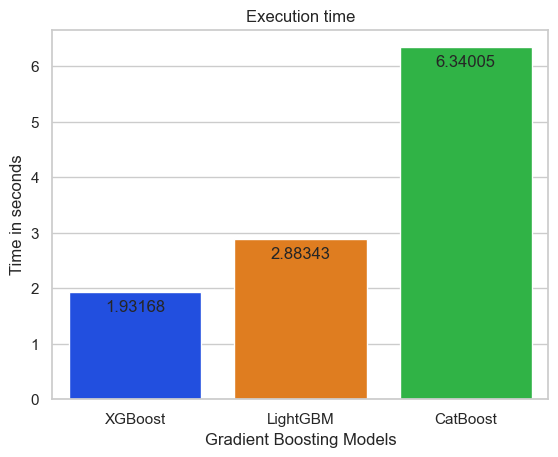

In [43]:
models = ["XGBoost", "LightGBM", "CatBoost"]
execution_times = [execution_time_xgb, execution_time_lgb, execution_time_cb]

ax_time = sns.barplot(x=models, y=execution_times, palette="bright")

plt.xlabel("Gradient Boosting Models")
plt.ylabel("Time in seconds")
plt.title("Execution time")

for i, v in enumerate(execution_times):
    ax_time.text(i, v - 0.4, f"{v:.5f}", ha="center", va="bottom", fontsize=12)

plt.show()

In big data analytics, model efficiency is crucial. However, our execution times are not reproducible and may differ depending on the data set or hardware configuration. Nevertheless, a discernible trend emerges that underscores the efficiency advantage of XGBoost and LightGBM over CatBoost. This effect may be attributed to the histogram-based tree method, a new feature introduced in XGBoost 2.0.0, which is also integrated into LightGBM.

Efficiency gains have a substantial impact on our infrastructure costs, energy consumption, and overall productivity. In the world of big data, where time is a valuable and limited resource, choosing a faster model can be a strategic advantage.

## 9. Conclusion <a class='anchor' id='conclusion'></a>

In summary, XGBoost is a powerful choice for structured data tasks due to its transparency, efficiency, and flexibility. It provides clear insights into feature importance, crucial in fields like healthcare and finance. 

Additionally, XGBoost is resource-efficient, making it cost-effective for organizations with smaller to medium-sized datasets.
XGBoost isn't just for classification it also handles regression and ranking tasks well. It deals effectively with messy or incomplete datasets, being robust against outliers and overfitting.

LightGBM and CatBoost are two more common gradient boosting libraries. When you consider to use gradient boosting, you always have to evaluate what certain strengths you need to solve the problem. Based on this evaluation, you can find the right library.

During this project some challanges occurred. For example gradient boosting libraries have been converging in terms of features and performance, making it challenging to compare the models effectively or even get the right informations about them.

Our project has also presented a series of challenges that have tested our data analysis and modeling capabilities. One of the key observations from our analysis is that the data between alcohol drinkers and non-drinkers does not differ significantly. In fact, the similarity in data between these two groups was often closer than we initially anticipated. This unexpected similarity posed a challenge in creating a robust predictive model.

In our pursuit of achieving the best model performance, we experimented with using a threshold for our XGBoost Model other than the conventional 0.5. While this led to a better F1 score, it came at the cost of an overall worse balance of metrics. This trade-off between precision and recall highlights it was a crucial aspect to consider in our project.

Another noteworthy aspect was our hyperparameter tuning efforts. We found that hyperparameter tuning was not as effective as initially expected. This could be attributed to the inherent similarity in the data between alcohol drinkers and non-drinkers. As a result, finding the optimal set of hyperparameters became a more intricate task than anticipated.

Lastly, we observed that our cleaned data, unfortunately, resulted in a slightly worse F1 score. However, it proved to be a necessary trade-off to avoid overfitting and maintain a good score during training. This emphasizes the importance of data preprocessing and the trade-offs involved in achieving a balanced and effective model, even if it means sacrificing some immediate gains in performance for the sake of long-term model stability and reliability.



## 10. Future Directions <a class='anchor' id='future'></a>

XGBoost 2.0.0 has recently been released on 12th september 2023. It brings several enhancements to the world of machine learning. Notable features include the introduction of vector-leaf tree models for multi-target regression, multi-label classification, and multi-class classification, which enables the construction of a single tree for all targets, offering benefits such as preventing overfitting and reducing model sizes.

Additionally the default tree method is set to histogram for improved model training efficiency. GPU-based approximate tree methods are supported for enhanced performance, with memory footprint optimization and improved external memory support.

Learning-to-rank tasks receive new features and parameters, while column-based split for federated learning and PySpark enhancements further enhance XGBoost's capabilities. We can now observe in the future how the new version will perform in practice. \
[Source](https://analyticsindiamag.com/xgboost-2-0-is-here/ "Source")

Furthermore recent experiments have shown that LLMs can be applied to structured data, though with limitations and a need for further development. Combining LLM-generated embeddings with traditional models like XGBoost shows potential but is still evolving. LLMs are gaining increasing prominence in society. So the focus is drifting a little bit towards LLM. 
While LLMs are potent, especially with clean, large datasets, XGBoost demonstrates the effectiveness of simplicity when working with structured data.

In essence, XGBoost continues to be the go-to choice for structured data, offering reliability and transparency. Although LLMs hold promise, especially for well-prepared large datasets, XGBoost maintains its position as the preferred tool for smaller datasets requiring transparency and efficiency. \
[Source](https://analyticsindiamag.com/xgboost-is-all-you-need/ "Source")

So it will be exciting to see where the technologies go in the future. In sectors where accuracy and insight into the technology plays a major role, traditional models like XGBoost are set for the near future.